<center>
<br>
<h1>
    Exploratory Data Analysis - IT 462
</h1>
    <h2>
        Income Tax Data Analysis
    </h2>
<br>
</center>
<table style="font-size: 15px; margin-left:0px;">
    <tr>
    <td>
        <h2>
        Group Number:
        </h2>
    </td>
        <td style="padding-left: 10px">
            <h2>
            17
            </h2>
        </td>
    </tr>
</table>
<h2>
    Team Members:
</h2>
<table style="font-size: 12px; margin-left:0px;">
    <tr>
    <td>
        <h2>
        Manish Prajapati
        </h2>
    </td>
        <td>
            <h2>
            202411012
            </h2>
        </td>
    </tr>
    <tr>
    <td>
        <h2>
        Yash Mehta
        </h2>
    </td>
        <td>
            <h2>
            202201309
            </h2>
        </td>
    </tr>
    <tr>
    <td>
        <h2>
        Bhavish Hiranandani
        </h2>
    </td>
        <td>
            <h2>
            202312070
            </h2>
        </td>
    </tr>
</table>

<h2>
    Datasets taken:
</h2>
    <table style="margin-left: 0px; font-size: 20px">
    <tr>
        <td>
        1.) State/UT wise PANs issues and ITRs filed for FY 2017-18
        </td>
        <td><a href="https://www.data.gov.in/resource/stateut-wise-number-pans-issued-and-income-tax-returns-itr-filed-during-2017-18-ministry">Government of India (data.gov.in)</a>
        </td>
    </tr>
    <tr>
        <td>
        2.) Income Tax Components by Size of Income by Place of Residence: Beginning Tax Year 1999
        </td>
        <td>
            <a href="https://www.data.gov.in/resource/stateut-wise-number-pans-issued-and-income-tax-returns-itr-filed-during-2017-18-ministry">Government of USA (data.gov)
            </a>
        </td>
    </tr>
</table>

<br>
<h2>
    India's Map:
</h2>

<table style="margin-left: 0px; font-size: 20px">
    <tr>
        <td>
        Indian Remote Sensing
        </td>
        <td>
            <a href="https://www.indianremotesensing.com/2017/01/Download-India-shapefile-with-kashmir.html"> Indian Map shape file with Kashmir
            </a>
        </td>
    </tr>
</table>

<br>
<h2>
    GitHub:
</h2>

<table style="margin-left: 0px; font-size: 20px">
    <tr>
        <td>
        GitHub Repository
        </td>
        <td>
            <a href="https://github.com/ManishPraa24/Exploratory-Data-Analysis/tree/main/Project">Exploratory-Data-Analysis Project
            </a>
        </td>
    </tr>
</table>

<h4>
    We have done Data Analysis of above datasets separately. Starting with 'State/UT wise PANs issues and ITRs filed for FY 2017-18'.
</h4>

<h2 style='font-size:30px'>
    Pre-requisites:
</h2>

<h3>
Importing Required Libraries
</h3>

In [294]:
# Importing required libraries

# Pandas for framing DataFrame of csv files,
# meta-data, data-cleaning, etc.
import pandas as pd

# Matplotlib for visualization
# Helpful for creating subplots
# and adjusting figure size
import matplotlib.pyplot as plt

# Seaborn for visualization
import seaborn as sns

# geopandas for working with maps and spatial data
import geopandas as gpd

# BytesIO for reading the byte file
from io import BytesIO

# requests for requesting the file
import requests

# importing os for performing file create/delete operations
import os

# tempfile is used for creating temporary files and folders during runtime
import tempfile

# MinMaxScaler for normalizing the values between minimum and maximum
from sklearn.preprocessing import MinMaxScaler

# Missingno package for visualizing the relationship
# between missing values in the dataset
import missingno as msno

# Ordinal Encoder for Encoding many unique attribute values (1, 2, 3, ...)
from sklearn.preprocessing import OrdinalEncoder

# OneHotEncoder for labeling in terms of 0s and 1s
from sklearn.preprocessing import OneHotEncoder

# ColumnTransformer is helpful for column transformation tasks
from sklearn.compose import ColumnTransformer

# Pipeline is used for stream lining the data-preprocessing and cleaning
from sklearn.pipeline import Pipeline

# Below metrics imported will give be used for calculating the accuracy
# and will give a proper report of our model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing 'XGBoost' classifier
import xgboost as xgb

# Used for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

<h2>
    Creating reusable functions for our data-analysis which made our code more readable
</h2>

<h4>
    a.) 'printDashLine' function will print a dash-line, in which you can pass your own symbol
</h4>

In [295]:
def printDashLine(dashes = 20, symbol="-"):
    print(symbol*dashes)

<h4>
    b.) 'printColumnType' function will print the attribute name, dtype of attribute and value type in that attribute
</h4>

In [296]:
def printColumnType(dataset, attribute_list=[], column_width=20, dtype_width=20):

    print(f"{'Column Name'.ljust(column_width)}   {'dtype'.ljust(dtype_width)}   {'Attribute value type'}")
    printDashLine(2*column_width)

    if len(attribute_list)==0:
        attribute_list = dataset.columns

    for x in attribute_list:
        type_of_data = str(dataset[x].dtype)
        type_of_value = str(type(dataset[x][0]))
    
        # Printing meta-data of attribute

        print(f"{x.ljust(column_width)} : {type_of_data.ljust(dtype_width)} : {type_of_value}")

<h4>
    c.) 'printUniqueValues' function will print the unique values of all the categorical attributes of the given dataset (optional: attribute list)
</h4>

In [297]:
def printUniqueValues(dataset, attribute_list=[]):

    if len(attribute_list)==0:
        attribute_list= dataset.select_dtypes(include=['object', 'category']).columns


    print("UNIQUE VALUES")
    printDashLine(50)

    for attr in attribute_list:
        unique_values = dataset[attr].unique()
        print(f"{attr}")
        printDashLine()
        print(f"{unique_values}")
        printDashLine()
        print("Total Unique values: ", len(unique_values))
        print()
        print()

<h4>
    d.) 'printUniqueValueCount' function will count the unique values present in the categorical attributes of the dataset
</h4>

In [298]:
def printUniqueValueCount(dataset, attribute_list=[]):

    
    if len(attribute_list)==0:
        attribute_list= dataset.select_dtypes(include=['object', 'category']).columns

    print("UNIQUE VALUE COUNT")
    printDashLine(50)

    for attr in attribute_list:
        print(f"{attr}")
        printDashLine()
        pd.set_option('display.max_rows', None)  # Show all rows
        print(dataset[attr].value_counts())
        pd.reset_option('display.max_rows')  # Show all rows
        print()
        print()
    

<h4>
    e.) 'cleanCategoricalData' function will remove the tuples with the mentioned attributes' values' having a count less than some threshold given. This step will ensure the tuples in the dataset are unambiguous.
</h4>

In [299]:
def cleanCategoricalData(dataFrame, categorical_features=[], feature_name="", feature_value="", threshold_count = 15):

    if feature_name == "":

        if categorical_features==[]:
            categorical_features = dataFrame.dtypes(include=['object', 'categorical']).columns

        for attr in categorical_features:

            cat_counts = dataFrame[attr].value_counts()
            valid_cats = cat_counts[cat_counts >= threshold_count].index

            dataFrame = dataFrame[dataFrame[attr].isin(valid_cats)]

        return dataFrame
        
    else:
        if feature_value=="" and feature_name!="":
            cat_counts = dataFrame[feature_name].value_counts()
            valid_cats = cat_counts[cat_counts >= threshold_count].index

            dataFrame = dataFrame[dataFrame[feature_name].isin(valid_cats)]

            return dataFrame
            
        elif feature_value!="" and feature_name != "":
            dataFrame = dataFrame[dataFrame[feature_name] != feature_value]

            return dataFrame
        else:
            print("No operation performed!")
            return dataFrame

<h4>
    f.) 'giveNullAttributes' function will return the attributes in a list having null values in the dataFrame given
</h4>

In [300]:
def giveNullAttributes(dataFrame):

    null_attrs = []

    for col in dataFrame.columns:

        if dataFrame[col].isnull().sum()>0:
            null_attrs.append(col)

    return null_attrs

<h4>
    g.) 'indicateMissingValue' function will create a column to indicate the missing values for the attributes in the dataFrame given
</h4>

In [301]:
def indicateMissingValue(dataFrame, missingValueAttrs):

    for attr in missingValueAttrs:

        dataFrame[f"{attr}_missing"] = dataFrame[attr].isnull().astype(int)

    return dataFrame
    

<h4>
    h.) 'plotBoxPlot()' function will plot the boxplots for given numerical columns in the dataset and will fetch the numerical columns if not explicitly provided
</h4>

In [302]:
def plotBoxPlot(dataFrame, numerical_columns=[], number_of_columns=3):

    if len(numerical_columns)==0:
        numerical_columns = dataFrame.select_dtypes(include=['number']).columns


    temp_num_column = []
    rows = dataFrame.shape[0]
    
    # Removing numerical attributes having all the tuples as null

    for col in numerical_columns:

        if dataFrame[col].isnull().sum()!=rows:
            temp_num_column.append(col)

    numerical_columns = temp_num_column

    n_rows = (len(numerical_columns) + number_of_columns - 1)//number_of_columns


    # Subplots creation

    fig, axes = plt.subplots(n_rows, number_of_columns, figsize = (15, 5*n_rows))
    axes = axes.flatten()                                               # Flattening axes for easy iteration


    # Plotting the each numerical attribute

    unused_counter = []

    for i, column in enumerate(numerical_columns):
        
        sns.boxplot(data=dataFrame, y=column, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel("")


    # Hiding any unused axes

    for j in range(len(numerical_columns), len(axes)):
        fig.delaxes(axes[j])

    for i in unused_counter:
        fig.delaxes(axes[i])


    # Adjusting Layout
    plt.tight_layout()
    plt.show()
    


<h4>
    i.) 'plotDistribution()' function will take dataFrame as input and numerical columns as an option and it will plot the distplot as well as histplot along side it to visualize the distribution
</h4>

In [303]:
def plotBoxPlot(dataFrame, numerical_columns=[], number_of_columns=3):

    if len(numerical_columns)==0:
        numerical_columns = dataFrame.select_dtypes(include=['number']).columns


    temp_num_column = []
    rows = dataFrame.shape[0]
    
    # Removing numerical attributes having all the tuples as null

    for col in numerical_columns:

        if dataFrame[col].isnull().sum()!=rows:
            temp_num_column.append(col)

    numerical_columns = temp_num_column

    n_rows = (len(numerical_columns) + number_of_columns - 1)//number_of_columns


    # Subplots creation

    fig, axes = plt.subplots(n_rows, number_of_columns, figsize = (15, 5*n_rows))
    axes = axes.flatten()                                               # Flattening axes for easy iteration


    # Plotting the each numerical attribute

    unused_counter = []

    for i, column in enumerate(numerical_columns):
        
        sns.boxplot(data=dataFrame, y=column, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel("")


    # Hiding any unused axes

    for j in range(len(numerical_columns), len(axes)):
        fig.delaxes(axes[j])

    for i in unused_counter:
        fig.delaxes(axes[i])


    # Adjusting Layout
    plt.tight_layout()
    plt.show()
    


<h4>
    j.) 'giveCorrMap' function will give the correlation heatmap for the numerical attributes mentioned
</h4>

In [304]:
def giveCorrMap(dataFrame, numerical_columns=[], title="Correlation Matrix Heatmap"):

    if len(numerical_columns)==0:
        numerical_columns = dataFrame.select_dtypes(include=['number']).columns

    
    # Plotting the heatmap for visualizing the correlation

    corr_matrix = dataFrame[numerical_columns].corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()
    

<h4>
    k.) 'detectOutliers' function will take the dataset and numerical columns, then it will flag the outliers in the numerical columns
</h4>

In [305]:
def detectOutliers(dataFrame, numerical_columns, q1=1.5, q3=1.5):

    outlier_flags = pd.DataFrame()

    for col in numerical_columns:
        Q1 = dataFrame[col].quantile(0.25)
        Q3 = dataFrame[col].quantile(0.75)
        IQR = Q3 - Q1

        # Defining the outlier thresholds
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        outlier_flags[col] = (dataFrame[col] < lower_bound) | (dataFrame[col]>upper_bound)

    dataFrame['outlier'] = outlier_flags.any(axis=1)

    return dataFrame
        

<h4>
    l.) 'evaluateModel' function will take predicted and test values, then it will give accuracy, classification report and confusion matrix
</h4>

In [401]:
def evaluateModel(y_pred, y_test, model_name="Model"):

    print(f"Accuracy of {model_name} is {accuracy_score(y_test, y_pred)*100:.4f}\n")

    print(f"Classification Report of {model_name}:\n", classification_report(y_test, y_pred))


    conf_matrix = confusion_matrix(y_test, y_pred)

    if len(pd.Series(y_pred).unique())>15:
        print("Number of unique values are more than 15. Visualization of correlation matrix is not ideal in this case.")
        return

    print(f"\nConfusion Matrix of {model_name}:\n")

    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    
    

<br>
<h1>
    Data Analysis of State/UT wise PANs issues and ITRs filed for FY 2017-18
</h1>
<br>

<h2>
    1.) Importing Dataset
</h2>
<br>
<h3>
    Importing State/UT wise PANs issues and ITRs filed for FY 2017-18 dataset 
</h3>

In [307]:
# Initializing URL of the state/UT dataset

state_ut_data_url = r"https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Datasets/India-Pan-Issues-ITRs.csv"

In [308]:
# Importing Dataset

state_ut_data = pd.read_csv(state_ut_data_url)

In [309]:
state_ut_data.head(7)

,Sr.,Name of state/UT,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18
0,1,Andaman & Nicobar Islands,203802,27267
1,2,Andhra Pradesh,19576371,4059895
2,3,Arunachal Pradesh,367698,21650
3,4,Assam,13846678,791450
4,5,Bihar,20884280,1967639
5,6,Chandigarh,828641,308423
6,7,Chhattisgarh,5235846,962594


<br>
<h3>
    Importing Indian map shape file
</h3>
<br>

In [310]:
# Initializing Map's URL

# map_url = r"https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Shape Files/india_st.shp"

urls = {
    'shp': r'https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Shape Files/india_st.shp',
    'shx': r'https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Shape Files/india_st.shx',
    'dbf': r'https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Shape Files/india_st.dbf'
}

<h3>
    Shapefiles involve multiple components (.shx, .dbf, etc.) and rely on filenames rather than purely memory streams. Hence, we will need to save the shape file temporarily.
</h3>

In [311]:
# Downloading India Map shape file and storing it the memory temporarily

# response = requests.get(map_url)

# Below is the code that we tried but failed to do so because of the above reason

# print(BytesIO(response.content))

# if response.status_code ==200:
#     india_map = gpd.read(response.content)
# else:
#     print(f"Error fetching the file: {response.status_code}")

# -------------------------------------------------------------------------------

# Using the temporary file saving approach

# if response.status_code == 200:

#     # Save to a temporary file 
#     temp_file = "temp_indian_map.shp"
    
#     with open(temp_file, "wb") as f:
#         f.write(response.content)

#     # Loading the temporarily saved Indian map shape file

#     try:
#         india_map = gpd.read_file(temp_file)
#     finally:
#         # Removing the temporary file
#         os.remove(temp_file)
# else:
#     print(f"Error fetching file: {response.status_code}")

# --------------------------------------------------------------------------------

# In above approach, we came to know that shape file requires different supporting files
# and those supporting files should exist in the same directory as that of shape file
# , hence, including shx, shp and dbf file formats, going for a new approach


with tempfile.TemporaryDirectory() as tmpdir:

    # Donwloading and saving file temporarily

    for ext, url in urls.items():

        response = requests.get(url)

        if response.status_code == 200:
            with open(f"{tmpdir}/india_st.{ext}", "wb") as f:
                f.write(response.content)
        else:
            print(f"Failed to download {url}")

    # Setting temporary shape file's path
    shapefile_path = f"{tmpdir}/india_st.shp"

    # Loading the geo-panda dataframe
    india_map = gpd.read_file(shapefile_path)


In [312]:
india_map.head(7)

,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."
5,CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596..."
6,DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.9624 20.28906,..."


<br>
<h2>
    2.) Exploring the dataset
</h2>
<br>

<h3>
    Checking type of data in each column using '.info()' method
</h3>

In [313]:
state_ut_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Sr.                                                     38 non-null     object
 1   Name of state/UT                                        38 non-null     object
 2   Cumulative number of PANs issued up to FY 2017-18       38 non-null     int64 
 3   Number of ITRs (including revised) filed in FY 2017-18  38 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


<h3>
    Knowing statistics of each numerical attribute using '.describe()' method
</h3>

In [314]:
state_ut_data.describe()

,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18
count,3.800000e+01,3.800000e+01
mean,1.999523e+07,3.610081e+06
std,6.137510e+07,1.110427e+07
min,1.673500e+04,2.445000e+03
25%,5.818328e+05,5.081350e+04
50%,4.988558e+06,7.456015e+05
75%,1.542372e+07,3.551438e+06
max,3.799094e+08,6.859155e+07


<h3>
    From above statistics, we have in total 38 tuples.
</h3>

<h3>
    Attributes and their value type in dataset:
</h3>

In [315]:
printColumnType(state_ut_data, column_width=60, dtype_width=10)

Column Name                                                    dtype        Attribute value type
------------------------------------------------------------------------------------------------------------------------
Sr.                                                          : object     : <class 'str'>
Name of state/UT                                             : object     : <class 'str'>
Cumulative number of PANs issued up to FY 2017-18            : int64      : <class 'numpy.int64'>
Number of ITRs (including revised) filed in FY 2017-18       : int64      : <class 'numpy.int64'>


<br>
<h2>
    3.) Data Cleaning
</h2>
<br>

<h3>
    From the source, shape file of India's map is ready to use, hence we will not perform this step on the shape file.
</h3>

<h3>
    Checking for null-values using 'isnull().sum()' method
</h3>
<h4>
    Above method will give us the individual sum of all null/empty values of all the attributes in the dataset
</h4>

In [316]:
state_ut_data.isnull().sum()

Sr.                                                       0
Name of state/UT                                          0
Cumulative number of PANs issued up to FY 2017-18         0
Number of ITRs (including revised) filed in FY 2017-18    0
dtype: int64

<h3>
    From above, as there are NO null values, we will proceed further.
</h3>

<br>
<h2>
    4.) Data Pre-Processing
</h2>
<br>

<h3>
    Separating categorical and numerical attributes using '.select_dtypes' method
</h3>
<h4>
    Specifying the required dtypes to filter out in 'include' parameter, it will return the attributes with only those data-types mentioned
</h4>

In [317]:
# Separating categorical attributes

state_ut_cat_columns = state_ut_data.select_dtypes(include=['object', 'category']).columns

In [318]:
# Separating numerical numerical attributes

state_ut_num_columns = state_ut_data.select_dtypes(include=['number']).columns

In [319]:
printColumnType(state_ut_data, attribute_list=state_ut_cat_columns, column_width=60, dtype_width=10)

print()
print()

printColumnType(state_ut_data, attribute_list=state_ut_num_columns, column_width=60, dtype_width=10)

Column Name                                                    dtype        Attribute value type
------------------------------------------------------------------------------------------------------------------------
Sr.                                                          : object     : <class 'str'>
Name of state/UT                                             : object     : <class 'str'>


Column Name                                                    dtype        Attribute value type
------------------------------------------------------------------------------------------------------------------------
Cumulative number of PANs issued up to FY 2017-18            : int64      : <class 'numpy.int64'>
Number of ITRs (including revised) filed in FY 2017-18       : int64      : <class 'numpy.int64'>


<h3>
    Knowing about the unique values of every categorical attributes
</h3>

In [320]:
# Printing Unique values

printUniqueValues(state_ut_data, state_ut_cat_columns)

UNIQUE VALUES
--------------------------------------------------
Sr.
--------------------
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' 'Total']
--------------------
Total Unique values:  38


Name of state/UT
--------------------
['Andaman & Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu'
 'Delhi' 'Foreign' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Total']
--------------------
Total Unique values:  38




<h3>
    Now, knowing about the unique value count of each values in the each categorical attribute column
</h3>

In [321]:
printUniqueValueCount(state_ut_data, attribute_list=state_ut_cat_columns)

UNIQUE VALUE COUNT
--------------------------------------------------
Sr.
--------------------
Sr.
1        1
29       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
30       1
2        1
31       1
32       1
33       1
34       1
35       1
36       1
37       1
21       1
20       1
19       1
18       1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
Total    1
Name: count, dtype: int64


Name of state/UT
--------------------
Name of state/UT
Andaman & Nicobar Islands    1
Punjab                       1
Maharashtra                  1
Manipur                      1
Meghalaya                    1
Mizoram                      1
Nagaland                     1
Odisha                       1
Puducherry                   1
Rajasthan                    1
Andhra Pradesh               1
Sikkim                       1
Tamil Nadu                  

<h4>
    Above, from unique value count, it can be seen that 'Sr.' is not adding any significance to the information that dataset is having. Hence, removing that column will be useful for our analysis.
</h4>

In [322]:
# Removing 'Sr.' from the state_ut_data

state_ut_data.drop(['Sr.'], axis=1, inplace=True)

In [323]:
state_ut_data.columns

Index(['Name of state/UT', 'Cumulative number of PANs issued up to FY 2017-18',
       'Number of ITRs (including revised) filed in FY 2017-18'],
      dtype='object')

<h4>
    Also, we don't need the 'total' in our name of state/UT, hence, removing the tuple with 'total' value in 'Name of state/UT'.
</h4>
<br>
<h3>
    This type of cleaning of data is called target cleaning, and in practice, it is usually the subset of data pre-processing. Because, the separating of attributes into categorical and numerical attributes is a Data pre-processing step.
</h3>
<br>

In [324]:
# Removing the 'total' from 'state'

state_ut_data = cleanCategoricalData(state_ut_data, feature_name='Name of state/UT', feature_value="Total")

state_ut_data.tail(7)

,Name of state/UT,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18
30,Sikkim,218067,12550
31,Tamil Nadu,25491651,4613164
32,Telangana,4741269,425655
33,Tripura,919143,76726
34,Uttar Pradesh,47738454,6258870
35,Uttarakhand,3561489,699753
36,West Bengal,31400426,4402652


<br>
<h2>
    5.) Data Transformation
</h2>
<br>

<br>
<h3>
    Now, to plot a map and show the attributes of State/UT data on the map for visualization, the STATE column of india_map and 'Name of state/UT' column of state_ut_data should have same values.
</h3>
<h3>
    Hence, making the values in state_ut_data's 'Name of state/UT' same as 'STATE' of india_map.
</h3>
<br>

In [325]:
# Making the values in state_ut_data's 'Name of state/UT' same as 'STATE'

for i in range(len(india_map['STATE'])):
    
    flag = True

    state = india_map['STATE'][i]

    for j in range(len(state_ut_data['Name of state/UT'])):

        state_2_split = state_ut_data.loc[j, 'Name of state/UT'].split(" ")

        for s_2_split in state_2_split:

            if s_2_split in state.capitalize():
                state_ut_data.loc[j, 'Name of state/UT'] = state
                flag = False
                break

    if flag:
        print(state, "MIS-MATCH")
        

ORISSA MIS-MATCH
PONDICHERRY MIS-MATCH


<h4>
    Above mis-match occurred because of difference of name. In the state_ut_data, Odisha is written instead of ORISSA, and similarly, Puducherry is written instead of 'PONDICHERRY'.
</h4>
<h4>
    Hence, now, manually correcting this mis-match of values (because of very-small dataset, going for manual updation).
</h4>

In [326]:
# Finding the index where 'Name of state/UT' is 'Odisha'
index_odisha = state_ut_data[state_ut_data['Name of state/UT'] == 'Odisha'].index

# Finding the index where 'Name of state/UT' is 'Puducherry'
index_pudu = state_ut_data[state_ut_data['Name of state/UT'] == 'Puducherry'].index

# Updating the value at 'Name of state/UT' where 'Odisha' is written
state_ut_data.loc[index_odisha, 'Name of state/UT'] = "ORISSA"

# Updating the value at 'Name of state/UT' where 'Puducherry' is written
state_ut_data.loc[index_pudu, 'Name of state/UT'] = "PONDICHERRY"


In [327]:
printUniqueValues(state_ut_data, attribute_list=['Name of state/UT'])

UNIQUE VALUES
--------------------------------------------------
Name of state/UT
--------------------
['ANDAMAN AND NICOBAR ISLANDS' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH'
 'ASSAM' 'BIHAR' 'CHANDIGARH' 'Chhattisgarh' 'DADRA AND NAGAR HAVELI'
 'DAMAN AND DIU' 'DELHI' 'Foreign' 'GOA' 'GUJARAT' 'HARYANA'
 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'Jharkhand' 'KARNATAKA' 'KERALA'
 'LAKSHADWEEP' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ORISSA' 'PONDICHERRY' 'PUNJAB' 'RAJASTHAN' 'SIKKIM'
 'TAMIL NADU' 'Telangana' 'TRIPURA' 'UTTAR PRADESH' 'Uttarakhand'
 'WEST BENGAL']
--------------------
Total Unique values:  37




<h4>
    Above, we just changed the values in the 'Name of state/UT'.
</h4>
<h4>
    Now, we will be normalizing the 'Cumulative number of PANs issued up to FY 2017-18' and 'Number of ITRs (including revised) filed in FY 2017-18'.
</h4>

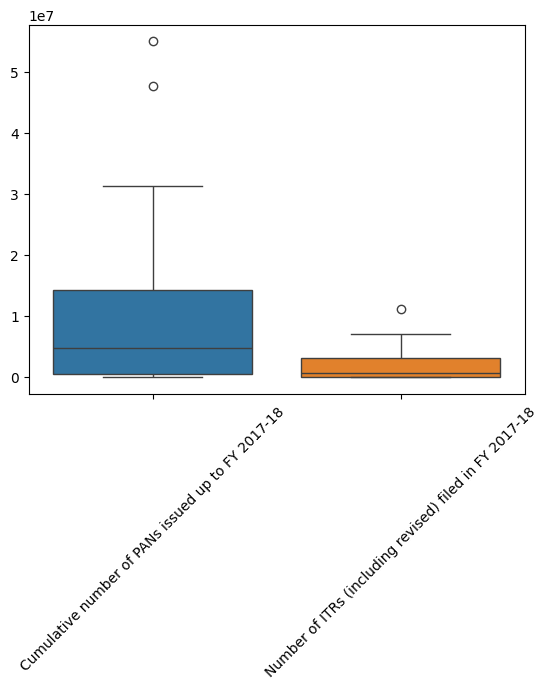

In [328]:
numeric_columns = state_ut_data.select_dtypes(include=['number'])

# Creating the boxplot
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)
plt.show()

In [329]:
# Initializing the MinMaxScaler()

scaler = MinMaxScaler()

In [330]:
# Normalizing the 'Cumulative number of PANs issued up to FY 2017-18' and 'Number of ITRs (including revised) filed in FY 2017-18'

state_ut_data['Cumulative number of PANs issued up to FY 2017-18 normalized'] = scaler.fit_transform(state_ut_data[['Cumulative number of PANs issued up to FY 2017-18']])

state_ut_data['Number of ITRs (including revised) filed in FY 2017-18 normalized'] = scaler.fit_transform(state_ut_data[['Number of ITRs (including revised) filed in FY 2017-18']])

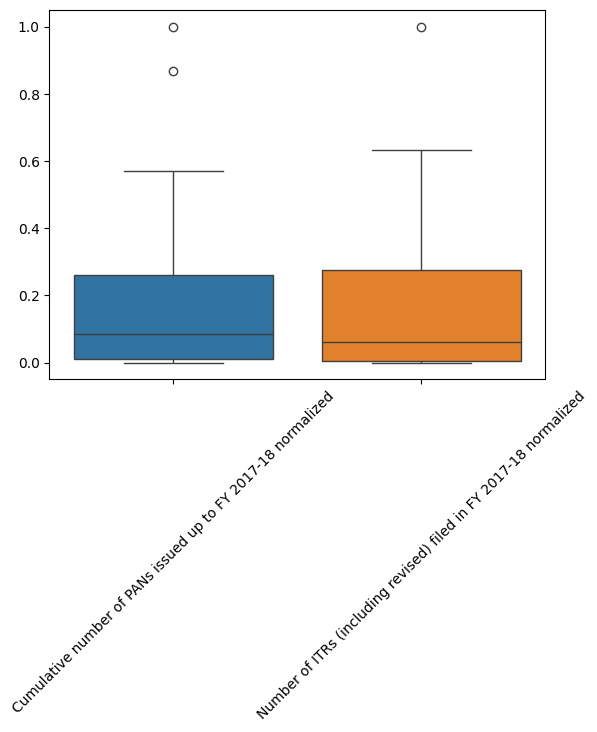

In [331]:
# Creating box plot for normalized numeric columns

numeric_columns = state_ut_data[['Cumulative number of PANs issued up to FY 2017-18 normalized', 'Number of ITRs (including revised) filed in FY 2017-18 normalized']]
# Creating the boxplot
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)
plt.show()

<h4>
    Above, the normalized values didn't made any significance difference in the removal of outliers. And, we cannot go for Standardization as the nature of this dataset is to use stats for visualization.
</h4>

<br>
<h3>
    Creating a new metric called 'Percent of ITRs per PAN holder' in order to get the idea that how many ITRs are being filed per PAN card holder (in percentage)
</h3>
<br>

In [332]:
# Creating a new metric named 'Percent of ITRs per PAN holder'
# The more is better

state_ut_data['Percent of ITRs per PAN holder'] = (state_ut_data['Number of ITRs (including revised) filed in FY 2017-18']/state_ut_data['Cumulative number of PANs issued up to FY 2017-18'])*100

In [333]:
state_ut_data.head(7)

,Name of state/UT,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18,Cumulative number of PANs issued up to FY 2017-18 normalized,Number of ITRs (including revised) filed in FY 2017-18 normalized,Percent of ITRs per PAN holder
0,ANDAMAN AND NICOBAR ISLANDS,203802,27267,0.003399,0.002222,13.379162
1,ANDHRA PRADESH,19576371,4059895,0.355430,0.363213,20.738752
2,ARUNACHAL PRADESH,367698,21650,0.006378,0.001719,5.887984
3,ASSAM,13846678,791450,0.251312,0.070630,5.715811
4,BIHAR,20884280,1967639,0.379197,0.175919,9.421627
5,CHANDIGARH,828641,308423,0.014754,0.027390,37.220340
6,Chhattisgarh,5235846,962594,0.094840,0.085950,18.384689


In [334]:
state_ut_data['Percent of ITRs per PAN holder normalized'] = (state_ut_data['Number of ITRs (including revised) filed in FY 2017-18 normalized']/state_ut_data['Cumulative number of PANs issued up to FY 2017-18 normalized'])*100

In [335]:
state_ut_data.head(7)

,Name of state/UT,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18,Cumulative number of PANs issued up to FY 2017-18 normalized,Number of ITRs (including revised) filed in FY 2017-18 normalized,Percent of ITRs per PAN holder,Percent of ITRs per PAN holder normalized
0,ANDAMAN AND NICOBAR ISLANDS,203802,27267,0.003399,0.002222,13.379162,65.366372
1,ANDHRA PRADESH,19576371,4059895,0.355430,0.363213,20.738752,102.189718
2,ARUNACHAL PRADESH,367698,21650,0.006378,0.001719,5.887984,26.956765
3,ASSAM,13846678,791450,0.251312,0.070630,5.715811,28.104390
4,BIHAR,20884280,1967639,0.379197,0.175919,9.421627,46.392616
5,CHANDIGARH,828641,308423,0.014754,0.027390,37.220340,185.651834
6,Chhattisgarh,5235846,962594,0.094840,0.085950,18.384689,90.626852


<br>
<h2>
    6.) Data Visualization
</h2>
<br>

<h3>
    First, we will join/merge the state_ut_data and india_map inorder to map the states in india_map with correct states in state_ut_data
</h3>

In [336]:
india_data = india_map.merge(state_ut_data, left_on="STATE", right_on = ["Name of state/UT"])

india_data.head(7)

,STATE,geometry,Name of state/UT,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18,Cumulative number of PANs issued up to FY 2017-18 normalized,Number of ITRs (including revised) filed in FY 2017-18 normalized,Percent of ITRs per PAN holder,Percent of ITRs per PAN holder normalized
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",ANDAMAN AND NICOBAR ISLANDS,203802,27267,0.003399,0.002222,13.379162,65.366372
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457...",ANDHRA PRADESH,19576371,4059895,0.355430,0.363213,20.738752,102.189718
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",ARUNACHAL PRADESH,367698,21650,0.006378,0.001719,5.887984,26.956765
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368...",ASSAM,13846678,791450,0.251312,0.070630,5.715811,28.104390
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523...",BIHAR,20884280,1967639,0.379197,0.175919,9.421627,46.392616
5,CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596...",CHANDIGARH,828641,308423,0.014754,0.027390,37.220340,185.651834
6,DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.9624 20.28906,...",DADRA AND NAGAR HAVELI,214351,34216,0.003591,0.002844,15.962603,79.199707


<h3>
    a. Cumulative number of PANs issued up to FY 2017-18
</h3>

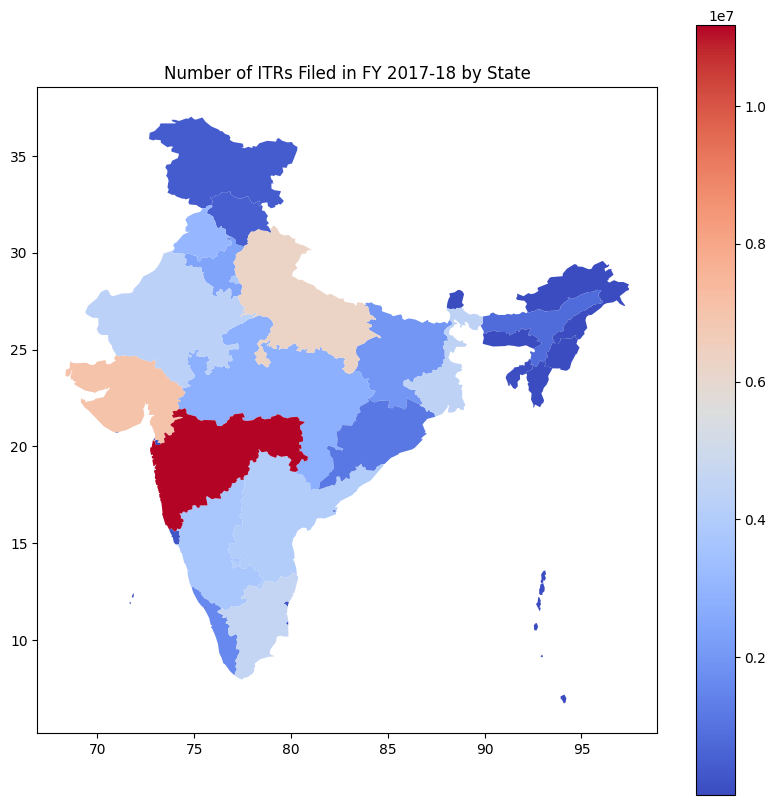

In [337]:
# Plotting India's Map for Number of ITRs filed

india_data.plot(column='Number of ITRs (including revised) filed in FY 2017-18', cmap='coolwarm', legend=True, figsize=(10, 10))
plt.title("Number of ITRs Filed in FY 2017-18 by State")
plt.show()

<h3>
    b. Cumulative number of PANs issued up to FY 2017-18
</h3>

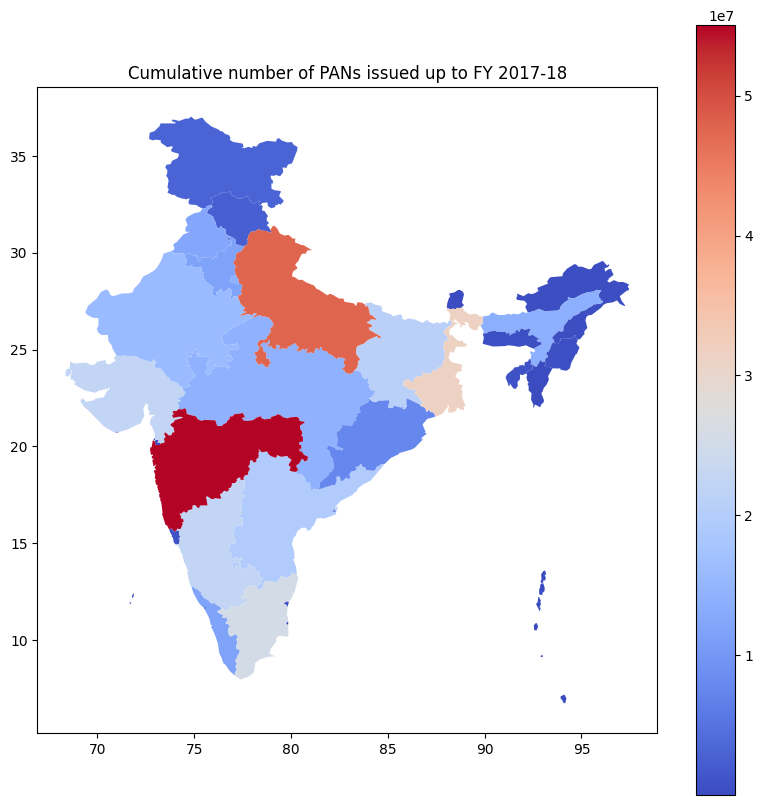

In [338]:
# Plotting India's Map for Cumulative number of PANs issued up to FY 2017-18

india_data.plot(column='Cumulative number of PANs issued up to FY 2017-18', cmap='coolwarm', legend=True, figsize=(10, 10))
plt.title("Cumulative number of PANs issued up to FY 2017-18")
plt.show()

<h3>
    c. Percent of ITRs per PAN holder
</h3>

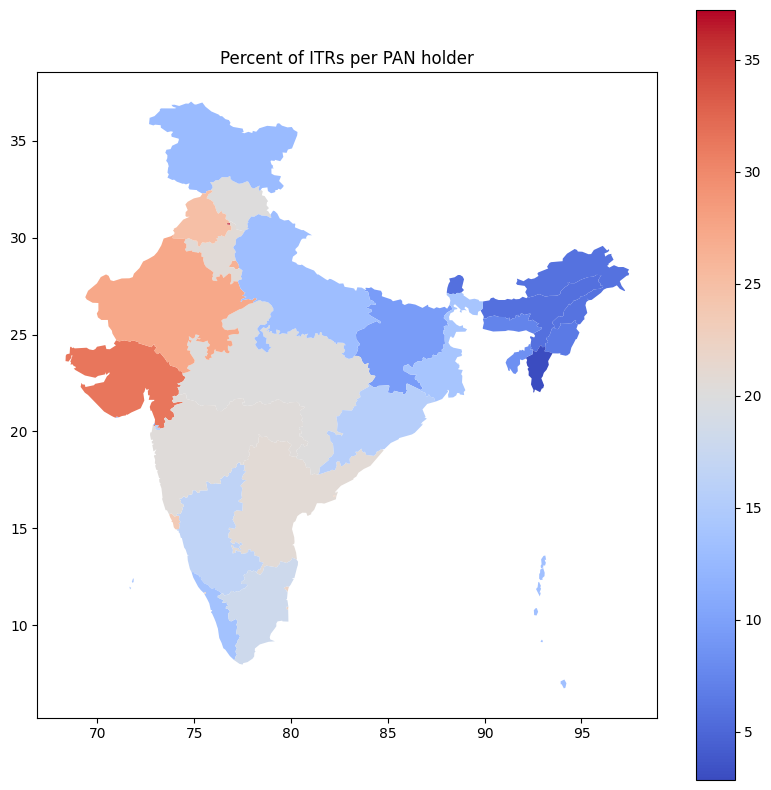

In [339]:
# Plotting India's Map for Percent of ITRs per PAN holder

india_data.plot(column='Percent of ITRs per PAN holder', cmap='coolwarm', legend=True, figsize=(10, 10))
plt.title("Percent of ITRs per PAN holder")
plt.show()

<h3>
    d. Correlation matrix of numerical attributes
</h3>

In [340]:
corr_matrix = state_ut_data[['Number of ITRs (including revised) filed in FY 2017-18', 'Cumulative number of PANs issued up to FY 2017-18', 'Percent of ITRs per PAN holder']].corr()

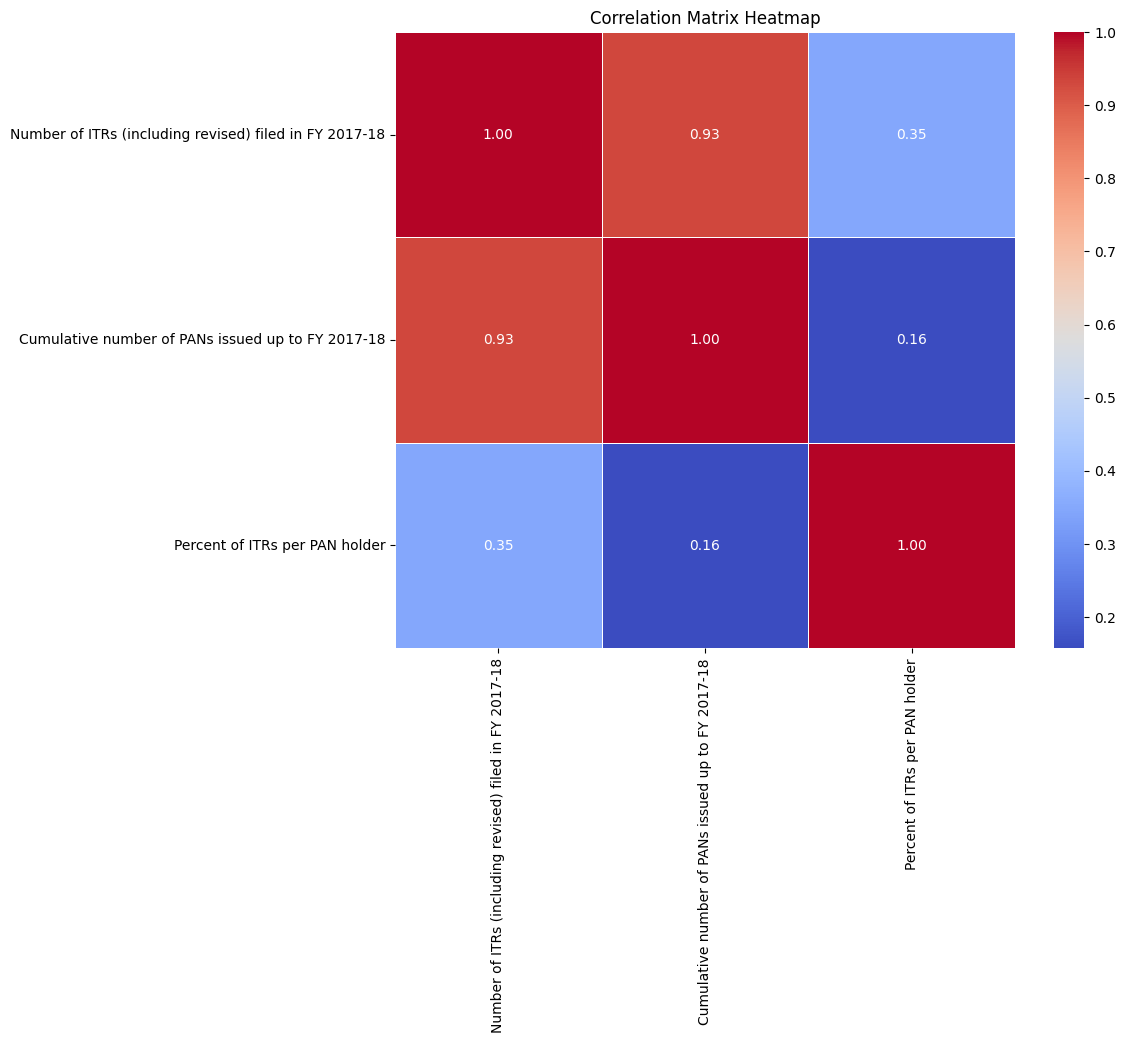

In [341]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

<h3>
    Observations:
</h3>
<ul style="font-size: 18px">
    <li>
        Maharastra is the state with most ITRs filed in FY 2017-18, followed by Gujarat and Uttar Pradesh.
    </li>
    <li>
        Again, Maharastra is the state with most Pancard holders in FY 2017-18, followed by Uttar Pradesh and West Bengal.
    </li>
    <li>
        For Percent of ITRs filed per Pan Card holder, Chandigarh is the place where people are actively filing ITR, followed by Gujarat, Rajasthan, Delhi and Goa.
    </li>
</ul>

<h3>
    Hence, above was the Data Analysis of Indian States ITRs filed and PAN card holders.
</h3>
<br>

<br>
<h1>
    Data Analysis of Income Tax Components by Size of Income by Place of Residence: Beginning Tax Year 1999
</h1>
<br>

<h2>
    1.) Importing Dataset
</h2>
<br>
<h3>
    Importing Income Tax Components by Size of Income by Place of Residence: Beginnig Tax Year 1999
</h3>

In [342]:
# Initializing URL of the us_tax_data dataset

us_tax_data_url = r"https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Datasets/Residence-Beginning-Tax-USA.csv"

In [343]:
# Importing Dataset

us_tax_data = pd.read_csv(us_tax_data_url)

In [344]:
us_tax_data.head(7)

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
0,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,6
1,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,7
2,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,8
3,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,105.0,0.0,2.0,0.0,0.0,150,1
4,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,255.0,0.0,21.0,1.0,1.0,150,2
5,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"10,000 - 19,999",NaN,194.0,3037.0,1232.0,35.0,661.0,27.0,23.0,150,3
6,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"20,000 - 29,999",NaN,299.0,7270.0,1785.0,81.0,2360.0,105.0,85.0,150,4


<br>
<h2>
    2.) Exploring the dataset
</h2>
<br>

<h3>
    Checking type of data in each column using '.info()' method
</h3>

In [345]:
# Getting shape of the dataset

us_tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Tax Year                                            23735 non-null  int64  
 1   Resident Type                                       23735 non-null  object 
 2   Place of Residence                                  23735 non-null  object 
 3   Country                                             23735 non-null  object 
 4   State                                               23735 non-null  object 
 5   County                                              23735 non-null  object 
 6   Income Class                                        23735 non-null  object 
 7   Disclosure                                          296 non-null    object 
 8   Number of All Returns                               23439 non-null  float64


<h3>
    Knowing statistics of each numerical attribute using '.describe()' method
</h3>

In [346]:
us_tax_data.describe()

,Tax Year,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
count,23735.000000,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,2.343900e+04,23735.000000,23735.000000
mean,2007.220645,2.531241e+04,2.137719e+06,3.229005e+05,1.411666e+04,1.752082e+06,1.204284e+05,8.154471e+04,81.604803,7.073773
std,4.632102,2.385621e+05,1.834359e+07,2.876288e+06,1.312834e+05,1.533540e+07,1.079722e+06,8.377998e+05,62.110581,3.827778
min,1999.000000,0.000000e+00,-1.370167e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.674790e+05,1.000000,1.000000
25%,2003.000000,2.210000e+02,1.088650e+04,2.882000e+03,4.400000e+01,4.779500e+03,2.360000e+02,3.600000e+01,30.000000,4.000000
50%,2008.000000,1.618000e+03,7.498000e+04,1.913200e+04,5.960000e+02,4.828600e+04,2.573000e+03,1.365000e+03,59.000000,7.000000
75%,2011.000000,5.996000e+03,3.659255e+05,7.283900e+04,2.907000e+03,2.588935e+05,1.526400e+04,8.602500e+03,128.000000,10.000000
max,2014.000000,9.082186e+06,6.736595e+08,1.092628e+08,4.720151e+06,5.755124e+08,3.912255e+07,3.501178e+07,250.000000,14.000000


<h3>
    Shape of dataset
</h3>

In [347]:
shape = us_tax_data.shape

print("Rows      : ", shape[0])
print("Attributes: ", shape[1])

Rows      :  23735
Attributes:  17


<h3>
    Attributes and their data types:
</h3>

In [348]:
printColumnType(us_tax_data, column_width=60)

Column Name                                                    dtype                  Attribute value type
------------------------------------------------------------------------------------------------------------------------
Tax Year                                                     : int64                : <class 'numpy.int64'>
Resident Type                                                : object               : <class 'str'>
Place of Residence                                           : object               : <class 'str'>
Country                                                      : object               : <class 'str'>
State                                                        : object               : <class 'str'>
County                                                       : object               : <class 'str'>
Income Class                                                 : object               : <class 'str'>
Disclosure                                                   : o

<br>
<h2>
    3.) Data Cleaning
</h2>
<br>

<h3>
    Checking for null-values using 'isnull().sum()' method
</h3>
<h4>
    Above method will give us the individual sum of all null/empty values of all the attributes in the dataset
</h4>

In [349]:
us_tax_data.isnull().sum()

Tax Year                                                  0
Resident Type                                             0
Place of Residence                                        0
Country                                                   0
State                                                     0
County                                                    0
Income Class                                              0
Disclosure                                            23439
Number of All Returns                                   296
NY AGI of All Returns (in thousands) *                  296
Deductions of All Returns (in thousands)                296
Dependent Exemptions of All Returns (in thousands)      296
Taxable Income of All Returns (in thousands)            296
Tax Before Credits of All Returns (in thousands)        296
Tax Liability of All Returns (in thousands) **          296
Place of Residence Sort Order                             0
Income Class Sort Order                 

<h3>
    Fetching the attributes' names with null values.
</h3>

In [350]:
us_tax_data_null_attrs = giveNullAttributes(us_tax_data)

print(f"Attributes with null values: \n{us_tax_data_null_attrs}")

Attributes with null values: 
['Disclosure', 'Number of All Returns', 'NY AGI of All Returns (in thousands) *', 'Deductions of All Returns (in thousands)', 'Dependent Exemptions of All Returns (in thousands)', 'Taxable Income of All Returns (in thousands)', 'Tax Before Credits of All Returns (in thousands)', 'Tax Liability of All Returns (in thousands) **']


<h3>
    Finding the correlation between the missing values
</h3>

<Axes: >

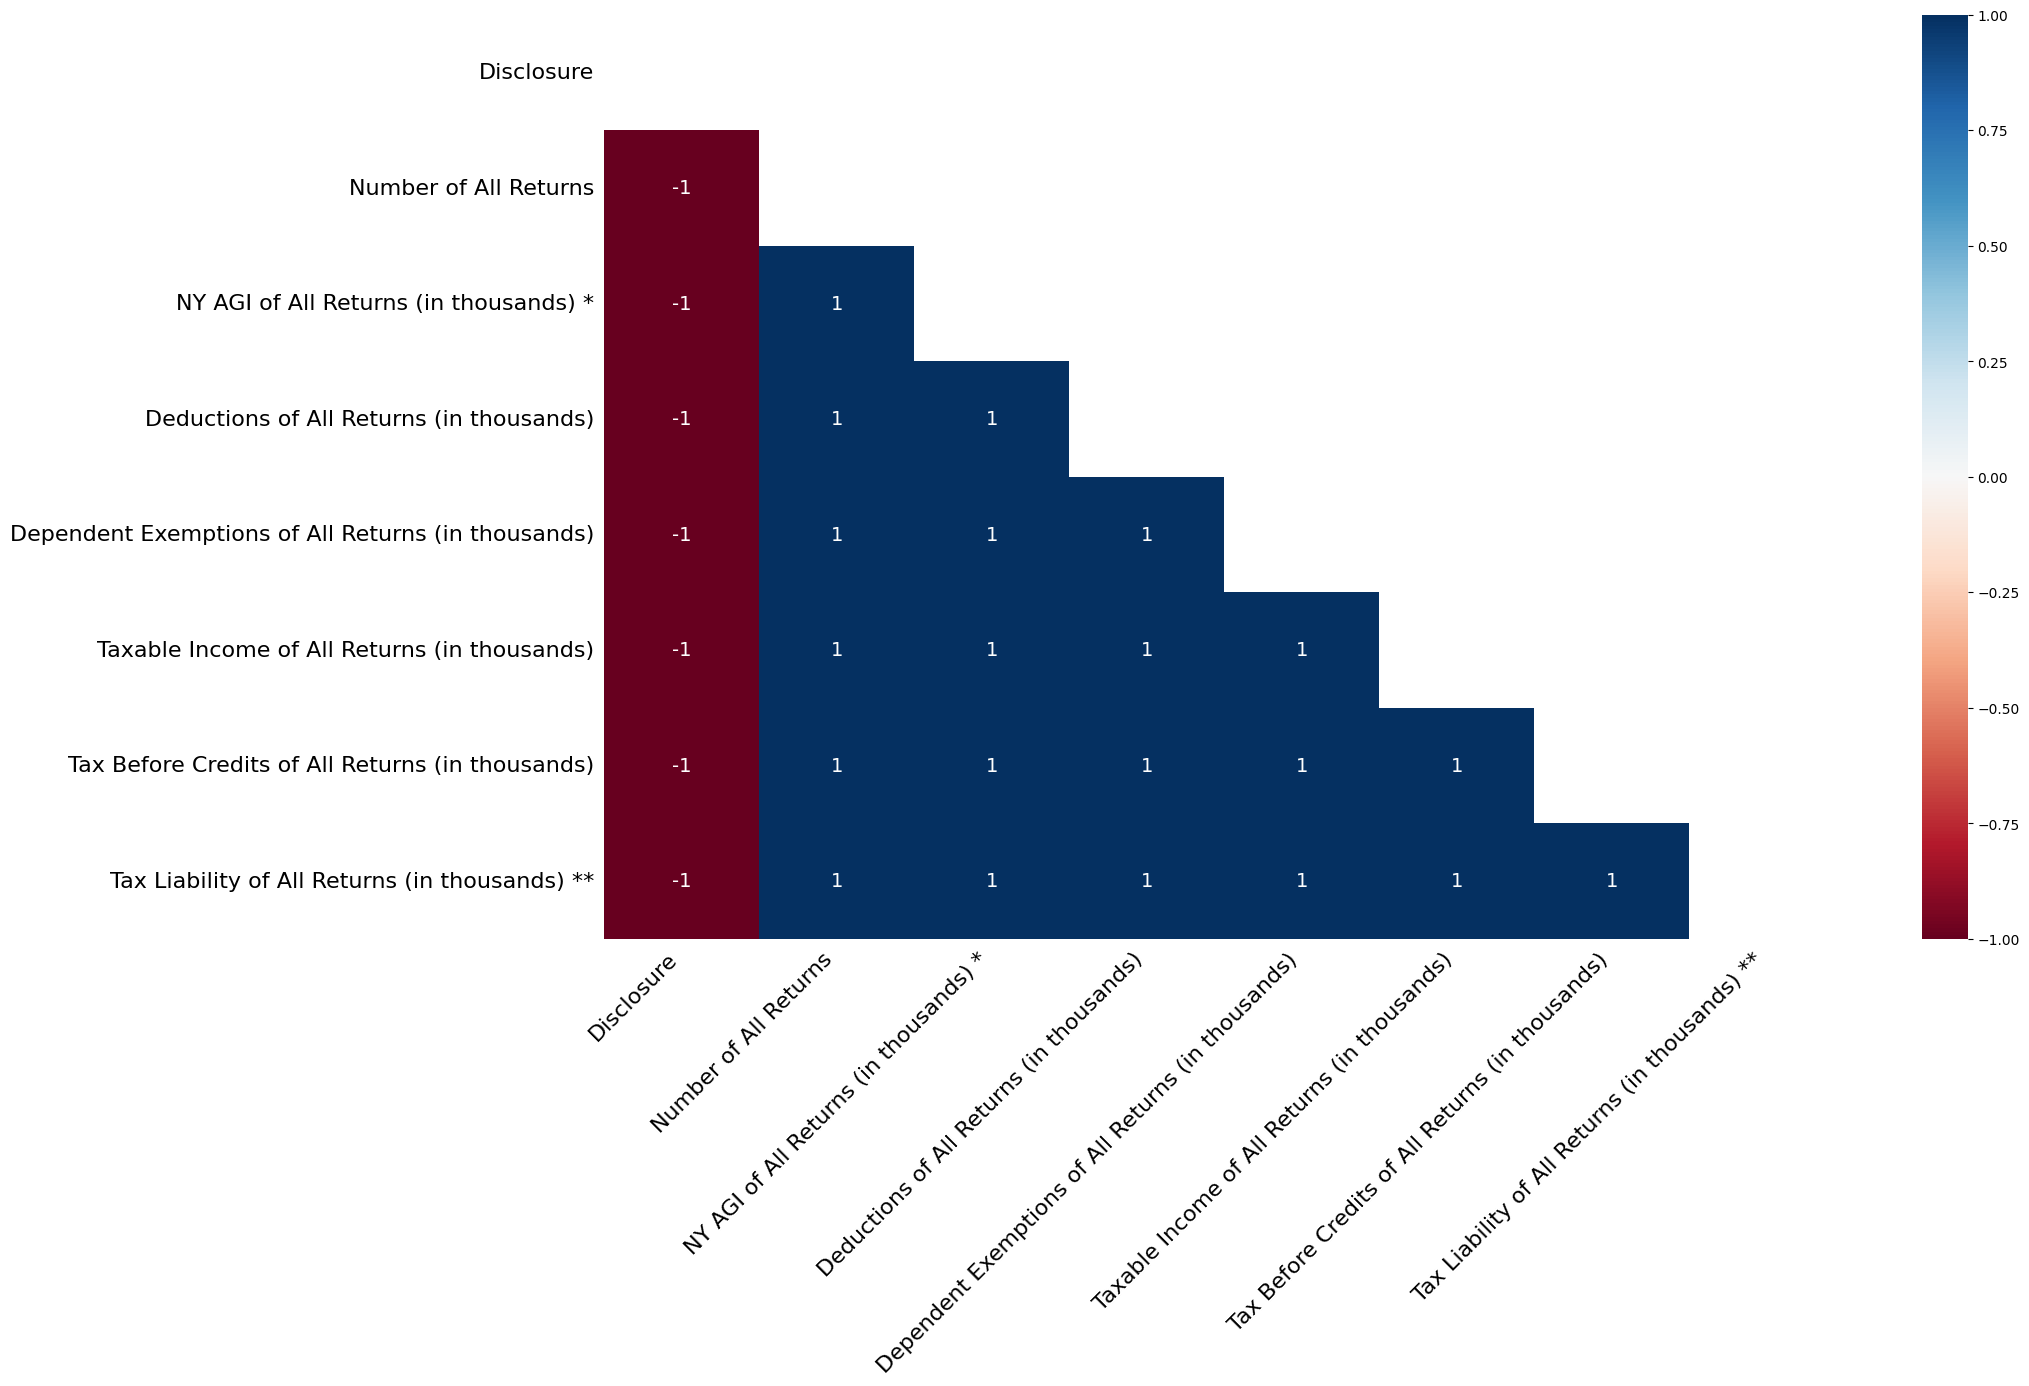

In [351]:
# Using heatmap for finding the correlation between the missing values

msno.heatmap(us_tax_data[us_tax_data_null_attrs])

<h3>
    Above, from heatmap, if Disclosure don't exists, the other numerical attributes exists and again, if numerical attributes don't exist, then Disclosure exists.
</h3>

<h3>
    Hence, its a problem of conditional nullity.
</h3>

<h3>
    Applying missing-value indicator in order to help the Machine Learning model learn about this conditional nullity in the data.
</h3>

In [352]:
# Applying the missing-value indicator attribute in-order to solve the conditional nullity problem
# Conditional nullity can occur or missing values in those attributes are likely to be MNAR type
# because, it highly depends on the responder of the survey, e.g. a student won't fill the things of working-professional and vice-versa


us_tax_data = indicateMissingValue(us_tax_data, us_tax_data_null_attrs)

us_tax_data.head(7)

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,...,Place of Residence Sort Order,Income Class Sort Order,Disclosure_missing,Number of All Returns_missing,NY AGI of All Returns (in thousands) *_missing,Deductions of All Returns (in thousands)_missing,Dependent Exemptions of All Returns (in thousands)_missing,Taxable Income of All Returns (in thousands)_missing,Tax Before Credits of All Returns (in thousands)_missing,Tax Liability of All Returns (in thousands) **_missing
0,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,...,205,6,0,1,1,1,1,1,1,1
1,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,...,205,7,0,1,1,1,1,1,1,1
2,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,...,205,8,0,1,1,1,1,1,1,1
3,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,...,150,1,1,0,0,0,0,0,0,0
4,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,...,150,2,1,0,0,0,0,0,0,0
5,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"10,000 - 19,999",NaN,194.0,3037.0,...,150,3,1,0,0,0,0,0,0,0
6,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"20,000 - 29,999",NaN,299.0,7270.0,...,150,4,1,0,0,0,0,0,0,0


In [353]:
# Again, finding the columns with their data types

printColumnType(us_tax_data, column_width=60)

Column Name                                                    dtype                  Attribute value type
------------------------------------------------------------------------------------------------------------------------
Tax Year                                                     : int64                : <class 'numpy.int64'>
Resident Type                                                : object               : <class 'str'>
Place of Residence                                           : object               : <class 'str'>
Country                                                      : object               : <class 'str'>
State                                                        : object               : <class 'str'>
County                                                       : object               : <class 'str'>
Income Class                                                 : object               : <class 'str'>
Disclosure                                                   : o

<br>
<h2 style="color:darkblue">
    Checking for ambuguity in the categorical attributes of the dataset.
</h2>
<br>

<h3>
    Finding the unique values in each categorical attributes.
</h3>

In [354]:
printUniqueValues(us_tax_data)

UNIQUE VALUES
--------------------------------------------------
Resident Type
--------------------
['Full-Year Nonresident' 'Part-Year Resident' 'Full-Year Resident']
--------------------
Total Unique values:  3


Place of Residence
--------------------
['Ireland' 'A.P.O./F.P.O' 'Canada' 'India' 'Mexico' 'China' 'France'
 'Germany' 'Israel' 'Italy' 'Japan' 'Puerto Rico' 'S. Korea'
 'United Kingdom' 'All Other Countries +++' 'Residence Unknown ++++'
 'Grand Total, Full-Year Nonresident' 'Grand Total, Part-Year Resident'
 'All Other States' 'Utah' 'Orleans' 'Nevada' 'Hamilton' 'Washington'
 'Dutchess' 'Ontario' 'New York City - Richmond' 'Clinton' 'Pennsylvania'
 'Saratoga' 'Onondaga' 'Texas' 'Massachusetts' 'Ulster' 'Livingston'
 'New Jersey' 'New York City - Kings' 'Westchester' 'Orange' 'Iowa'
 'Cortland' 'Oswego' 'Sullivan' 'Rockland' 'Missouri' 'Delaware' 'Oregon'
 'Fulton' 'Schoharie' 'Genesee' 'Seneca' 'Albany'
 'New York City - Manhattan' 'Columbia' 'Chautauqua' 'Schuyler' 'Wayn

<h3>
    Counting the occurrence of the unique values in the categorical attributes
</h3>

In [355]:
printUniqueValueCount(us_tax_data)

UNIQUE VALUE COUNT
--------------------------------------------------
Resident Type
--------------------
Resident Type
Full-Year Resident       13515
Full-Year Nonresident    10012
Part-Year Resident         208
Name: count, dtype: int64


Place of Residence
--------------------
Place of Residence
Washington                            416
Delaware                              404
Wyoming                               264
Hamilton                              209
Rhode Island                          208
New Hampshire                         208
Jefferson                             208
Monroe                                208
Grand Total, Full-Year Resident       208
Colorado                              208
Allegany                              208
Lewis                                 208
Herkimer                              208
Rensselaer                            208
California                            208
Montgomery                            208
Cattaraugus                  

<h3>
    By going through the count of categorical values, it seems genuine data.
</h3>
<h3>
    Hence, here we conclude that there are no miscellanous/out of box values in categorical attributes.
</h3>

<br>
<h2 style="color: darkblue">
    Detecting outlier in numerical data :
</h2>
<br>

<h3>
    Using boxplot for visualizing the intensity of outliers
</h3>

In [356]:
numerical_attrs = list(us_tax_data.select_dtypes(include=['number']).columns)

numerical_attrs

['Tax Year',
 'Number of All Returns',
 'NY AGI of All Returns (in thousands) *',
 'Deductions of All Returns (in thousands)',
 'Dependent Exemptions of All Returns (in thousands)',
 'Taxable Income of All Returns (in thousands)',
 'Tax Before Credits of All Returns (in thousands)',
 'Tax Liability of All Returns (in thousands) **',
 'Place of Residence Sort Order',
 'Income Class Sort Order',
 'Disclosure_missing',
 'Number of All Returns_missing',
 'NY AGI of All Returns (in thousands) *_missing',
 'Deductions of All Returns (in thousands)_missing',
 'Dependent Exemptions of All Returns (in thousands)_missing',
 'Taxable Income of All Returns (in thousands)_missing',
 'Tax Before Credits of All Returns (in thousands)_missing',
 'Tax Liability of All Returns (in thousands) **_missing']

<h3>
    Above, we don't want '_missing' indicators, hence, we will avoid them in outlier detection
</h3>

In [357]:
# Removing '_missing' value indicator attributes from the list of numerical attributes

retain_attrs = []

for attr in numerical_attrs:
    if 'missing' not in attr:
        retain_attrs.append(attr)

numerical_attrs = retain_attrs
del retain_attrs

numerical_attrs

['Tax Year',
 'Number of All Returns',
 'NY AGI of All Returns (in thousands) *',
 'Deductions of All Returns (in thousands)',
 'Dependent Exemptions of All Returns (in thousands)',
 'Taxable Income of All Returns (in thousands)',
 'Tax Before Credits of All Returns (in thousands)',
 'Tax Liability of All Returns (in thousands) **',
 'Place of Residence Sort Order',
 'Income Class Sort Order']

In [358]:
# Extracting the categorical attributes

us_tax_data_categorical_attributes = us_tax_data.select_dtypes(include=['object', 'category']).columns

print("Categorical attributes in us_tax_data are: \n", us_tax_data_categorical_attributes)

Categorical attributes in us_tax_data are: 
 Index(['Resident Type', 'Place of Residence', 'Country', 'State', 'County',
       'Income Class', 'Disclosure'],
      dtype='object')


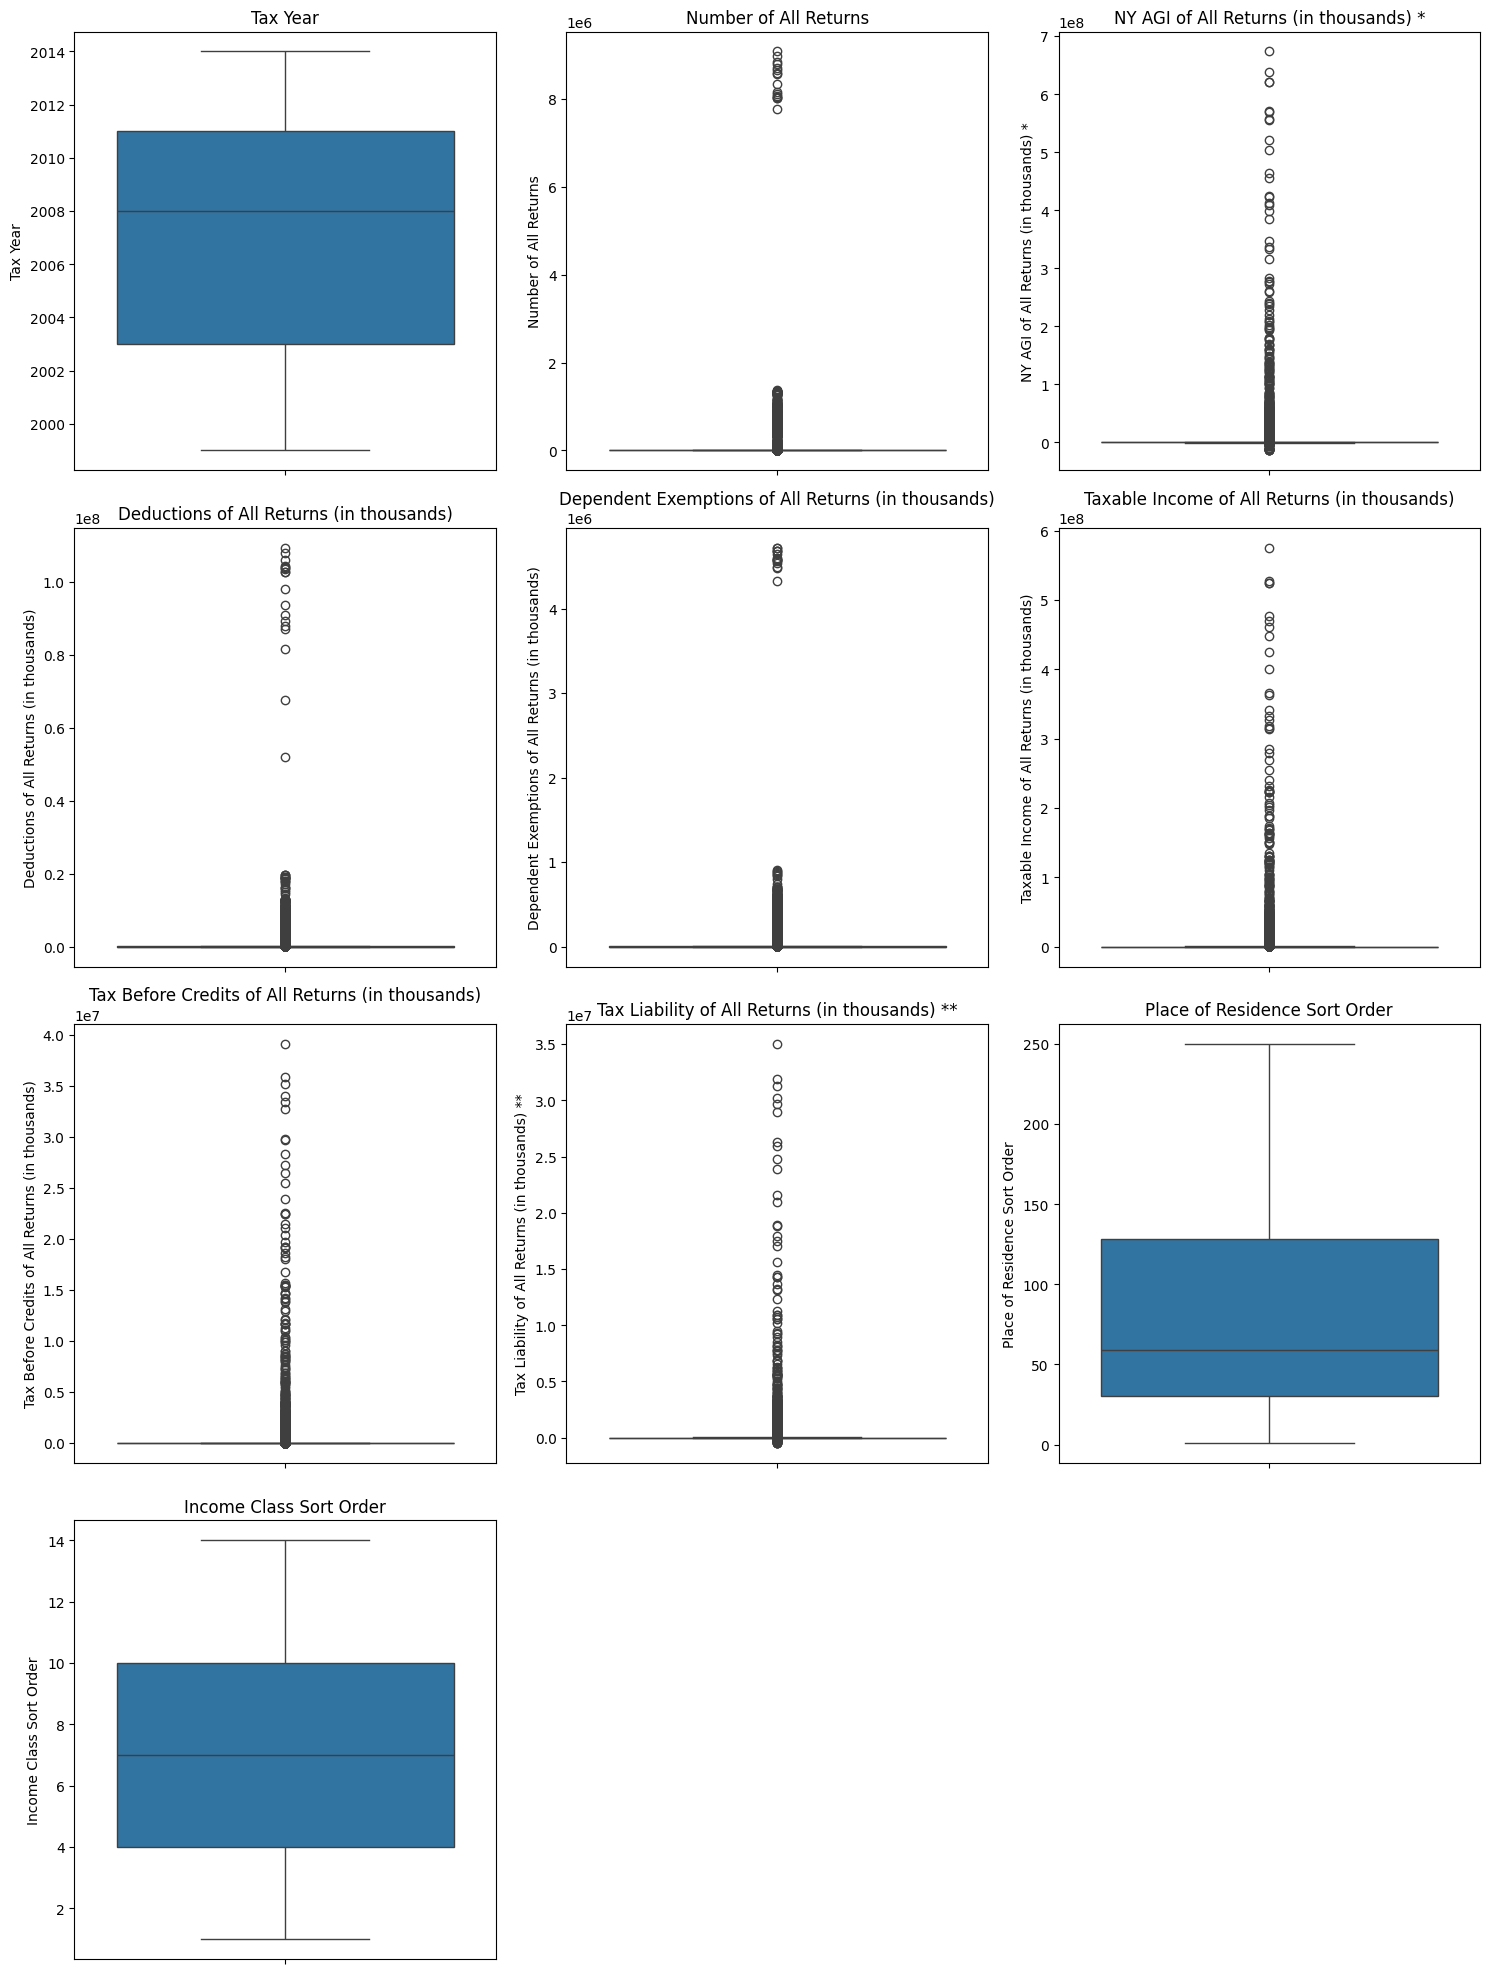

In [359]:
# Creating boxplots in subplots

plotBoxPlot(us_tax_data, numerical_attrs)

<h3>
    Above, there are no outliers in 'Tax year', 'Place of Residence Sort Order' and 'Income Class Sort Order'.
</h3>

<h3>
    For 'Number of All Returns', 'Deductions of All Returns (in thousands)' and 'Dependent Exemptions of All Returns (in thousands)', the outliers seems to have formed two different groups.
</h3>

<h3>
    This is the case of separate data populations and in our case, we are getting them as either the data record will have disclosure or null (no-dsiclosure).
</h3>
<h3>
    Hence, we need to separate the different data populations and again check for outliers.
</h3>

<h4>
    Separating data with/without disclosure
</h4>

In [360]:

us_tax_data_disclosed = us_tax_data[us_tax_data['Disclosure'].notnull()]
us_tax_data_disclosed.head(7)

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,...,Place of Residence Sort Order,Income Class Sort Order,Disclosure_missing,Number of All Returns_missing,NY AGI of All Returns (in thousands) *_missing,Deductions of All Returns (in thousands)_missing,Dependent Exemptions of All Returns (in thousands)_missing,Taxable Income of All Returns (in thousands)_missing,Tax Before Credits of All Returns (in thousands)_missing,Tax Liability of All Returns (in thousands) **_missing
0,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,...,205,6,0,1,1,1,1,1,1,1
1,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,...,205,7,0,1,1,1,1,1,1,1
2,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,...,205,8,0,1,1,1,1,1,1,1
13,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"200,000 - 249,999",d/,NaN,NaN,...,150,11,0,1,1,1,1,1,1,1
15,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"500,000 and over",d/,NaN,NaN,...,150,13,0,1,1,1,1,1,1,1
30,2012,Full-Year Nonresident,Mexico,Mexico,Not Applicable,Not Applicable,"20,000 - 29,999",d/,NaN,NaN,...,209,4,0,1,1,1,1,1,1,1
93,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"75,000 - 99,999",d/,NaN,NaN,...,205,9,0,1,1,1,1,1,1,1


In [361]:
# Separating data population with no disclosure

us_tax_data_not_disclosed = us_tax_data[us_tax_data['Disclosure'].isnull()]

us_tax_data_not_disclosed.head(7)

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,...,Place of Residence Sort Order,Income Class Sort Order,Disclosure_missing,Number of All Returns_missing,NY AGI of All Returns (in thousands) *_missing,Deductions of All Returns (in thousands)_missing,Dependent Exemptions of All Returns (in thousands)_missing,Taxable Income of All Returns (in thousands)_missing,Tax Before Credits of All Returns (in thousands)_missing,Tax Liability of All Returns (in thousands) **_missing
3,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,...,150,1,1,0,0,0,0,0,0,0
4,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,...,150,2,1,0,0,0,0,0,0,0
5,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"10,000 - 19,999",NaN,194.0,3037.0,...,150,3,1,0,0,0,0,0,0,0
6,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"20,000 - 29,999",NaN,299.0,7270.0,...,150,4,1,0,0,0,0,0,0,0
7,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"30,000 - 39,999",NaN,178.0,6152.0,...,150,5,1,0,0,0,0,0,0,0
8,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"40,000 - 49,999",NaN,84.0,3739.0,...,150,6,1,0,0,0,0,0,0,0
9,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"50,000 - 59,999",NaN,73.0,3971.0,...,150,7,1,0,0,0,0,0,0,0


<h3>
    Above, we have separated the data population with and without disclosure.
</h3>

<h3>
    Now, again, checking for outlier in both populations separately
</h3>

<h4>
    Checking for one with disclosure
</h4>

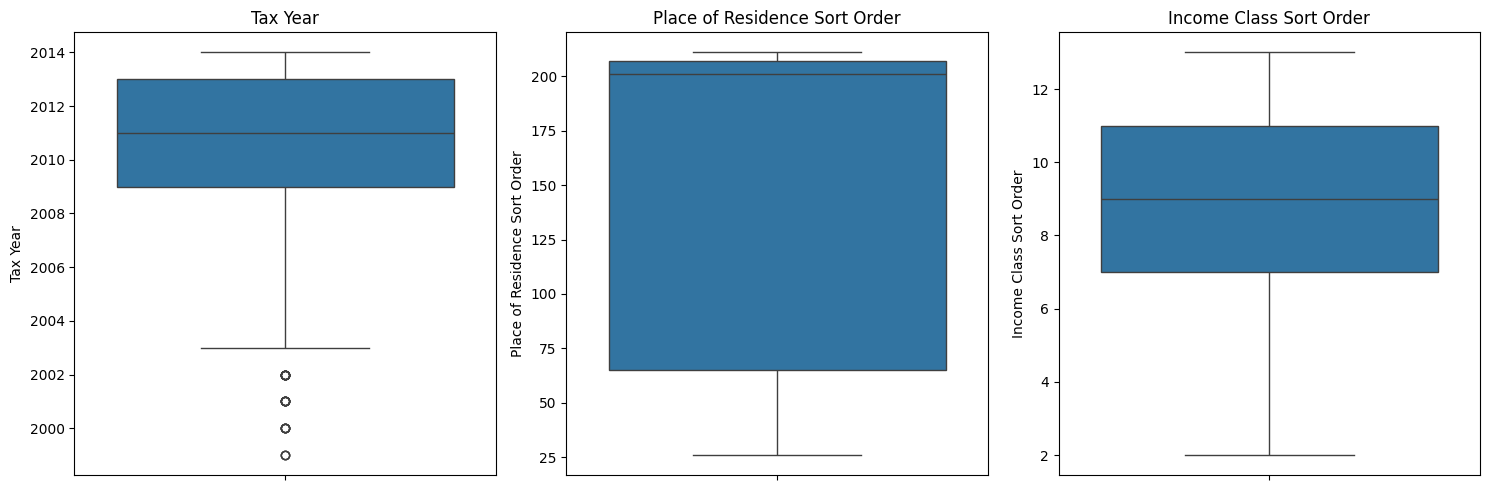

In [362]:
# Plotting the boxplot for data with disclosure

plotBoxPlot(dataFrame=us_tax_data_disclosed, numerical_columns=numerical_attrs)

<h3>
    Above, we got outliers in 'Tax Year'. It is interesting to see outliers in tax year of data population with disclosure.
</h3>

<h3>
    Now, we will detect the outlier in the data population having 'no disclosure'.
</h3>

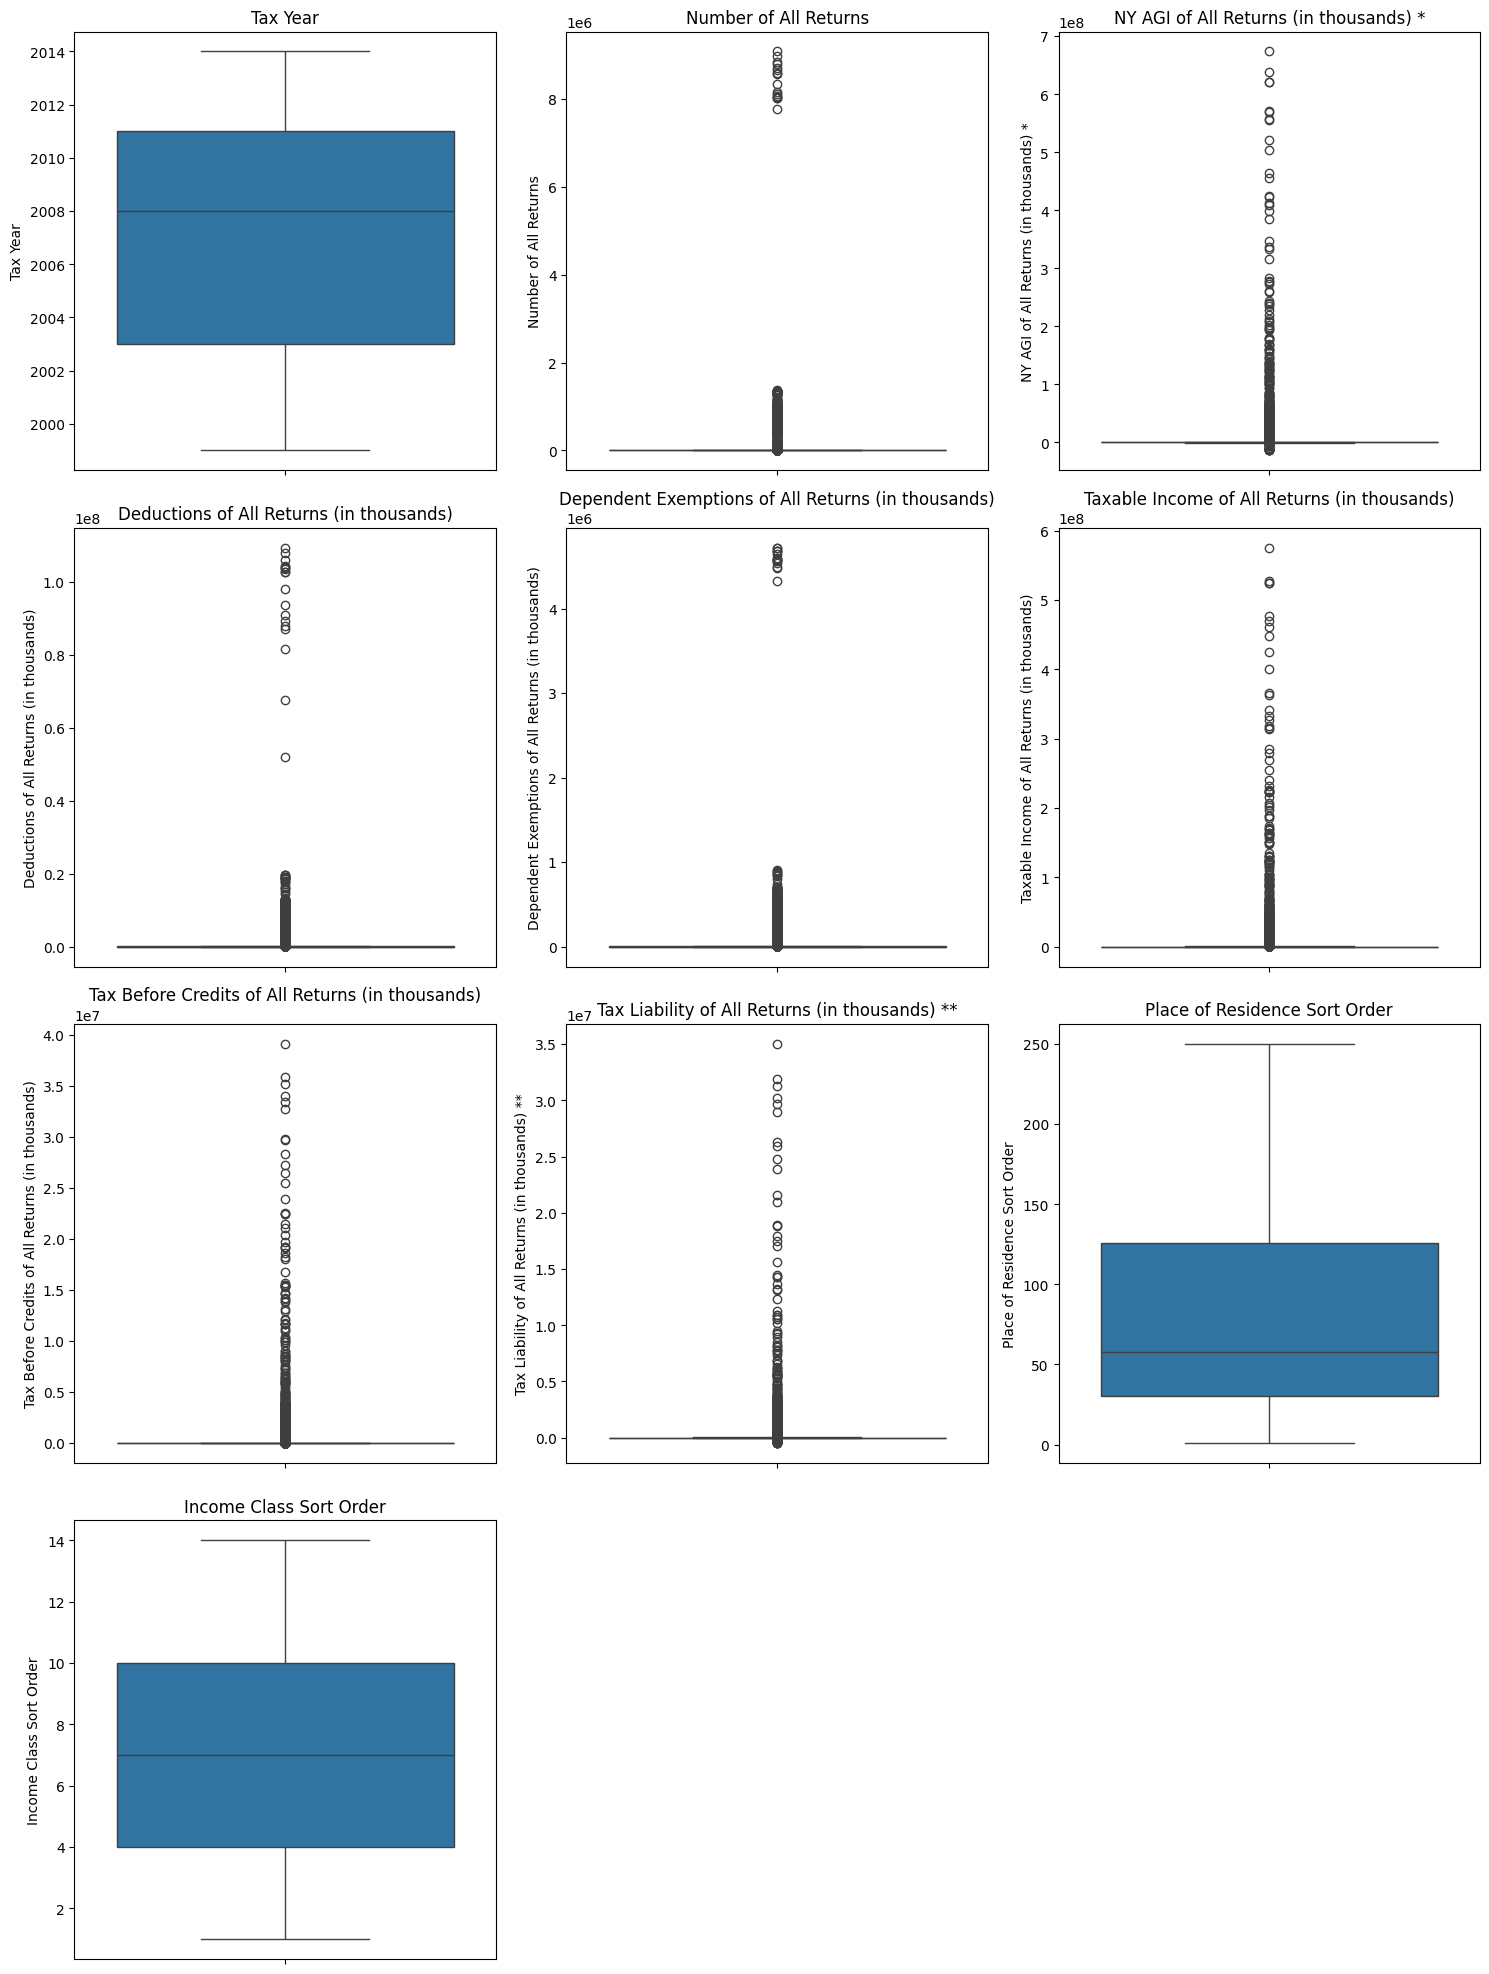

In [363]:
# Plotting boxplot for the data population without outliers

plotBoxPlot(us_tax_data_not_disclosed, numerical_attrs)


<h3>
    The situation of different data population seems to exists still, now, checking for correlation between these numerical attributes in order to find different population
</h3>

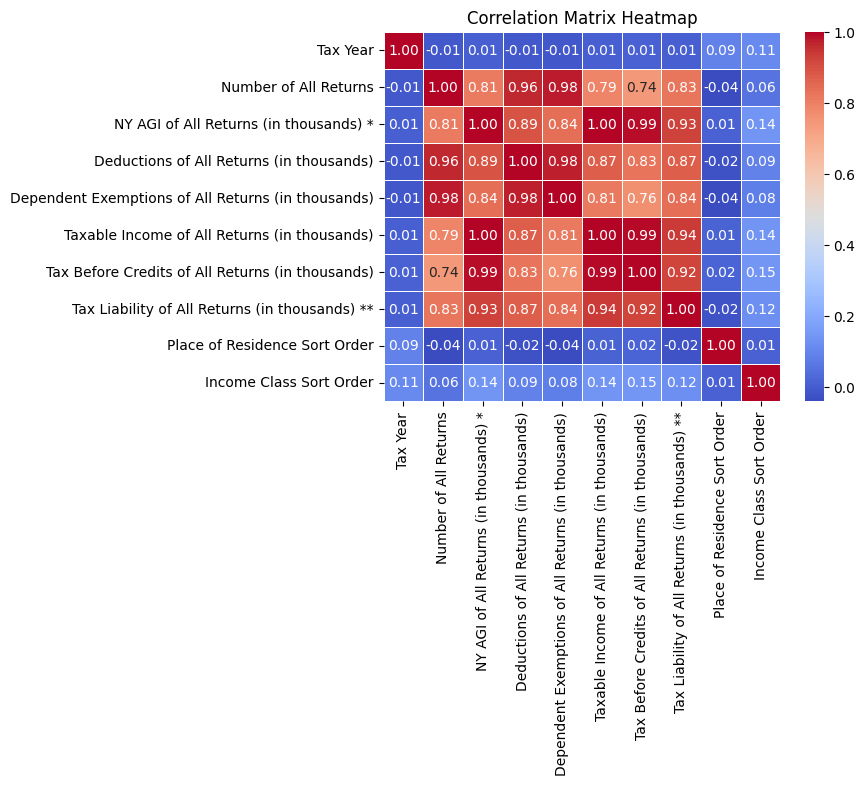

In [364]:
# Plotting the heatmap for visualizing the correlation

giveCorrMap(us_tax_data, numerical_attrs)

<h3>
    Above, 'Tax Year', 'Place of Residence Sort Order' and 'Income Class Sort Order' is having very less correlation with other attributes.
</h3>

<h4>
    Hence,removing them for required numerical attributes and finding the correlation matrix.
</h4>

In [365]:
numerical_attrs.remove('Tax Year')
numerical_attrs.remove('Income Class Sort Order')
numerical_attrs.remove('Place of Residence Sort Order')

In [366]:
numerical_attrs

['Number of All Returns',
 'NY AGI of All Returns (in thousands) *',
 'Deductions of All Returns (in thousands)',
 'Dependent Exemptions of All Returns (in thousands)',
 'Taxable Income of All Returns (in thousands)',
 'Tax Before Credits of All Returns (in thousands)',
 'Tax Liability of All Returns (in thousands) **']

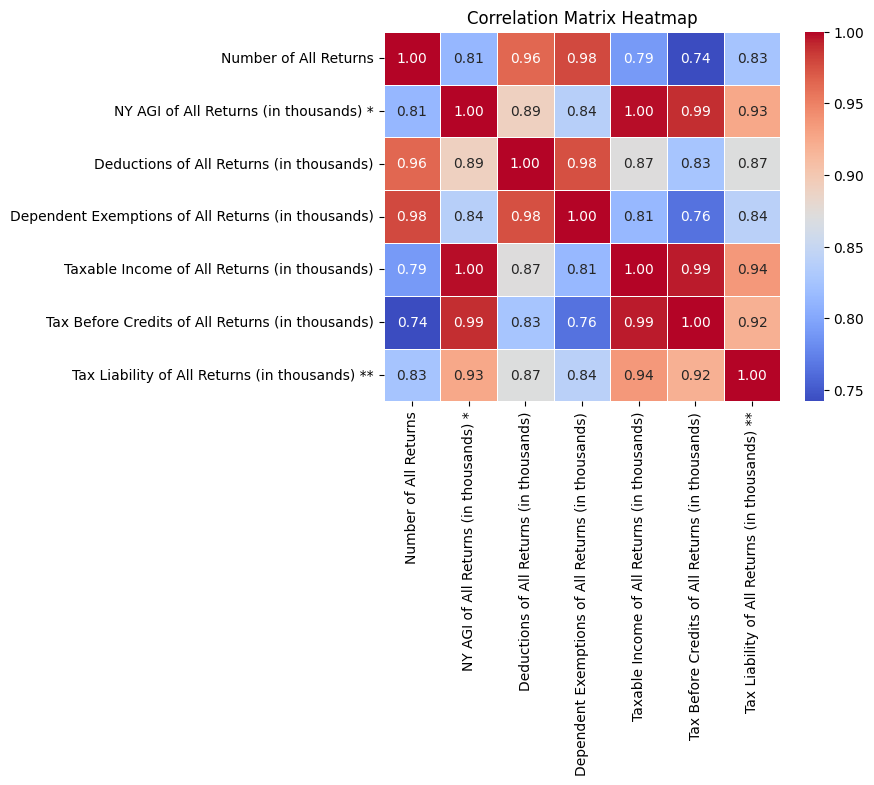

In [367]:
# Plotting the heatmap for visualizing the correlation

giveCorrMap(us_tax_data, numerical_attrs)


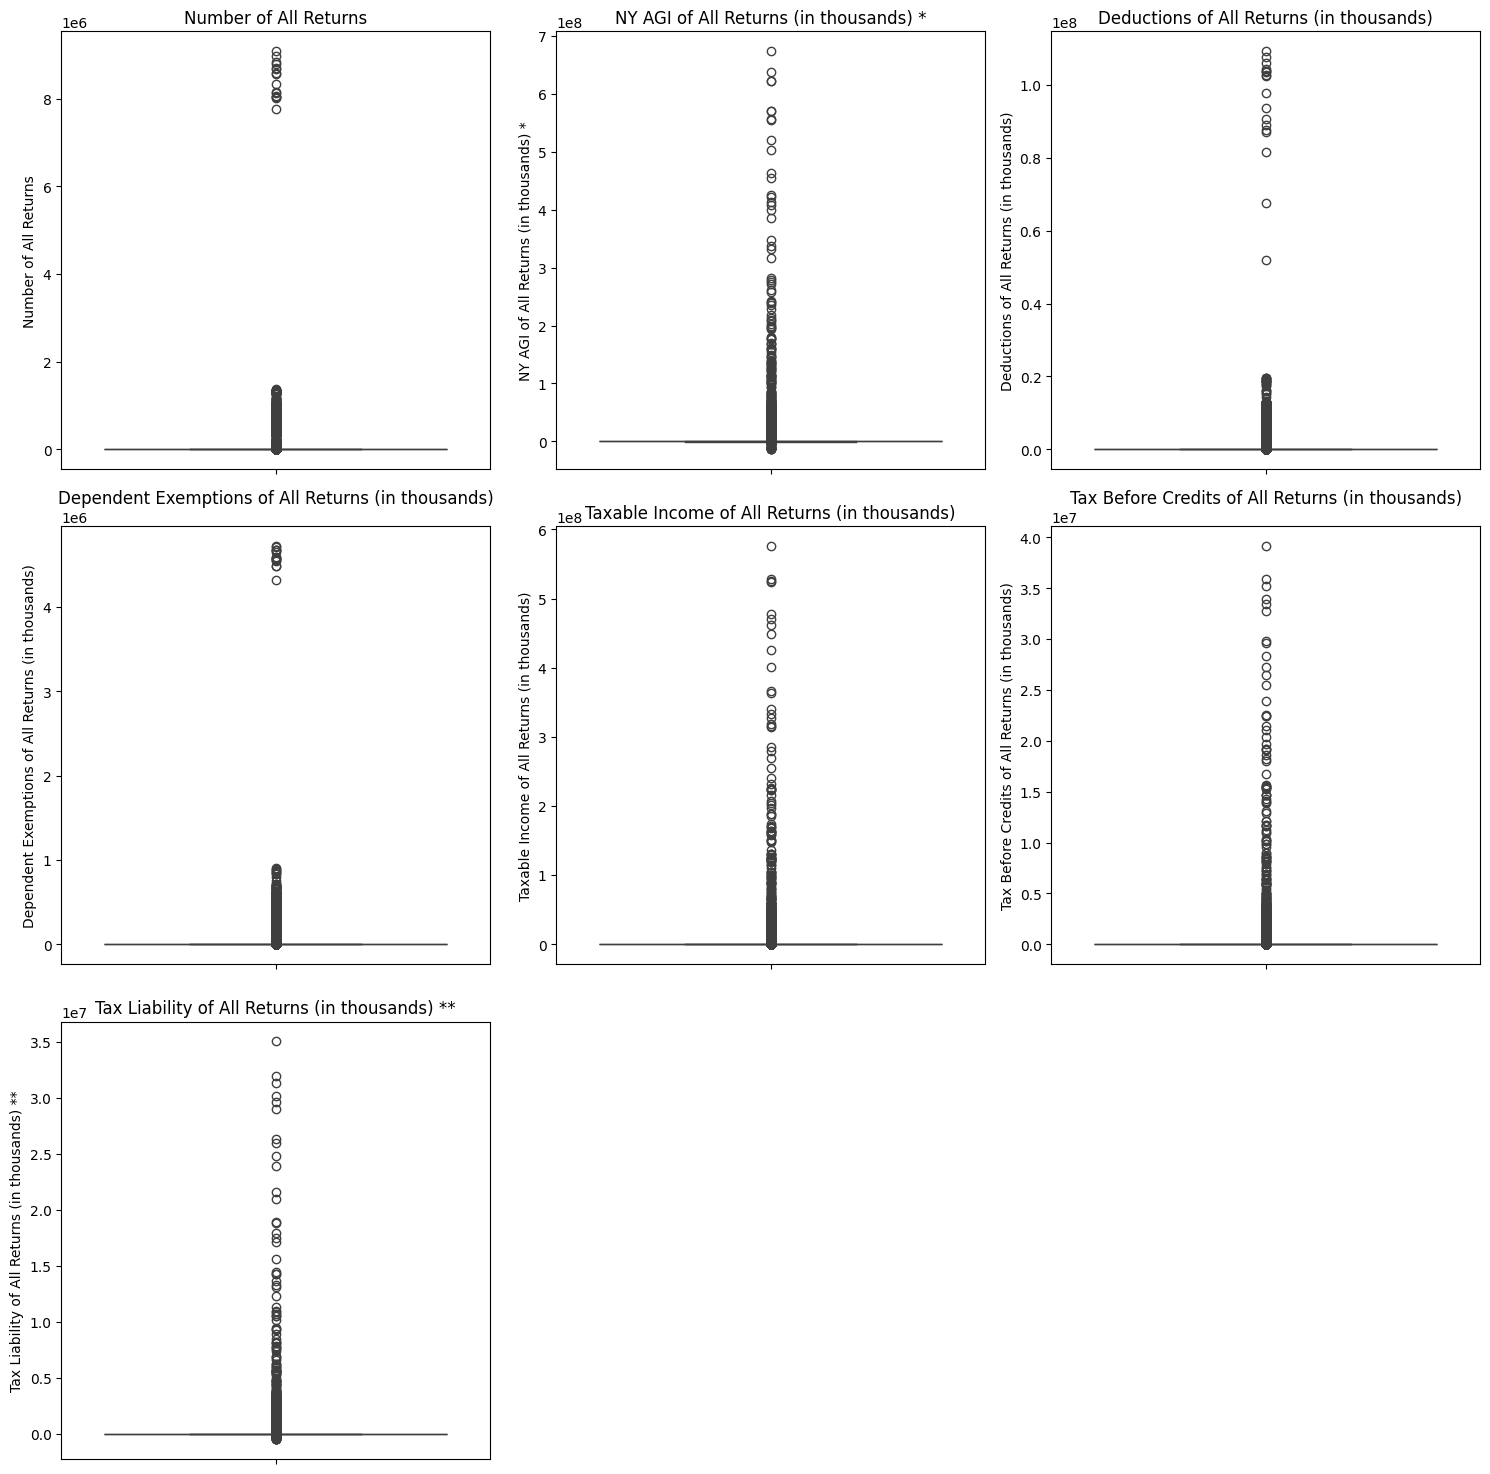

In [368]:
# Again plotting the boxplot for visualizing outliers

plotBoxPlot(us_tax_data, numerical_attrs)

<h3>
    From above boxplots, 'Number of All Returns', 'Deductions of All Returns (in thousands)' and 'Dependent Exemptions of All Returns (in thousands)' are forming two groups of outliers, hence fetching separating those tuples from dataset in order to find separate data-population.
</h3>

In [369]:
# Finding those tuples

numerical_columns_outliers = ['Number of All Returns', 'Deductions of All Returns (in thousands)', 'Dependent Exemptions of All Returns (in thousands)']

In [370]:
us_tax_data = detectOutliers(us_tax_data, numerical_columns_outliers)

us_tax_data.head(7)

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,...,Income Class Sort Order,Disclosure_missing,Number of All Returns_missing,NY AGI of All Returns (in thousands) *_missing,Deductions of All Returns (in thousands)_missing,Dependent Exemptions of All Returns (in thousands)_missing,Taxable Income of All Returns (in thousands)_missing,Tax Before Credits of All Returns (in thousands)_missing,Tax Liability of All Returns (in thousands) **_missing,outlier
0,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,...,6,0,1,1,1,1,1,1,1,False
1,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,...,7,0,1,1,1,1,1,1,1,False
2,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,...,8,0,1,1,1,1,1,1,1,False
3,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,...,1,1,0,0,0,0,0,0,0,False
4,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,...,2,1,0,0,0,0,0,0,0,False
5,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"10,000 - 19,999",NaN,194.0,3037.0,...,3,1,0,0,0,0,0,0,0,False
6,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"20,000 - 29,999",NaN,299.0,7270.0,...,4,1,0,0,0,0,0,0,0,False


In [371]:
outlier_rows = us_tax_data[us_tax_data['outlier']]
outlier_rows.drop('outlier', axis=1, inplace=True)
outlier_rows

C:\Users\manishpra\AppData\Local\Temp\ipykernel_22148\2331719060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_rows.drop('outlier', axis=1, inplace=True)


,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,...,Place of Residence Sort Order,Income Class Sort Order,Disclosure_missing,Number of All Returns_missing,NY AGI of All Returns (in thousands) *_missing,Deductions of All Returns (in thousands)_missing,Dependent Exemptions of All Returns (in thousands)_missing,Taxable Income of All Returns (in thousands)_missing,Tax Before Credits of All Returns (in thousands)_missing,Tax Liability of All Returns (in thousands) **_missing
223,2012,Full-Year Nonresident,Residence Unknown ++++,Residence Unknown ++++,Not Applicable,Not Applicable,Total,NaN,33363.0,14936523.0,...,214,14,1,0,0,0,0,0,0,0
224,2012,Full-Year Nonresident,"Grand Total, Full-Year Nonresident",All,All - Excluding New York,"Grand Total, Full-Year Nonresident","Under 5,000",NaN,67265.0,-12419674.0,...,215,1,1,0,0,0,0,0,0,0
225,2012,Full-Year Nonresident,"Grand Total, Full-Year Nonresident",All,All - Excluding New York,"Grand Total, Full-Year Nonresident","5,000 - 9,999",NaN,31756.0,236321.0,...,215,2,1,0,0,0,0,0,0,0
226,2012,Full-Year Nonresident,"Grand Total, Full-Year Nonresident",All,All - Excluding New York,"Grand Total, Full-Year Nonresident","10,000 - 19,999",NaN,54586.0,815955.0,...,215,3,1,0,0,0,0,0,0,0
227,2012,Full-Year Nonresident,"Grand Total, Full-Year Nonresident",All,All - Excluding New York,"Grand Total, Full-Year Nonresident","20,000 - 29,999",NaN,50201.0,1246802.0,...,215,4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,2014,Full-Year Nonresident,New Jersey,United States,New Jersey,All,"100,000 - 199,999",NaN,114029.0,16268636.0,...,130,10,1,0,0,0,0,0,0,0
23708,2014,Full-Year Resident,Suffolk,United States,New York,Suffolk,"200,000 - 249,999",NaN,16615.0,3680939.0,...,53,11,1,0,0,0,0,0,0,0
23711,2014,Full-Year Resident,New York City - Manhattan,United States,New York,New York City - Manhattan,"30,000 - 39,999",NaN,62662.0,2187941.0,...,3,5,1,0,0,0,0,0,0,0
23714,2014,Full-Year Resident,New York City - Queens,United States,New York,New York City - Queens,"30,000 - 39,999",NaN,100990.0,3516249.0,...,4,5,1,0,0,0,0,0,0,0


<h3>
    From above, there are 4598 tuples/rows forming two separate data populations.
</h3>

<h3>
    Now, we will find the categorical values of all such attributes and analyze the differentiating values in them.
</h3>

In [372]:
printUniqueValueCount(outlier_rows)

UNIQUE VALUE COUNT
--------------------------------------------------
Resident Type
--------------------
Resident Type
Full-Year Resident       3667
Full-Year Nonresident     785
Part-Year Resident        146
Name: count, dtype: int64


Place of Residence
--------------------
Place of Residence
Nassau                                208
Suffolk                               208
Grand Total, Full-Year Nonresident    208
Grand Total, Full-Year Resident       208
New York City - Manhattan             208
Westchester                           208
New York City - Kings                 204
New York City - Queens                183
Monroe                                179
Erie                                  179
New Jersey                            176
New York City - Bronx                 175
New York City - Richmond              175
Onondaga                              174
Orange                                154
Grand Total, Part-Year Resident       146
Rockland                        

<h3>
    Finding the same for tuples which are not outliers
</h3>

In [373]:
non_outlier_rows = us_tax_data[~us_tax_data['outlier']]
non_outlier_rows.drop('outlier', axis=1, inplace=True)
non_outlier_rows

C:\Users\manishpra\AppData\Local\Temp\ipykernel_22148\599182522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_rows.drop('outlier', axis=1, inplace=True)


,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,...,Place of Residence Sort Order,Income Class Sort Order,Disclosure_missing,Number of All Returns_missing,NY AGI of All Returns (in thousands) *_missing,Deductions of All Returns (in thousands)_missing,Dependent Exemptions of All Returns (in thousands)_missing,Taxable Income of All Returns (in thousands)_missing,Tax Before Credits of All Returns (in thousands)_missing,Tax Liability of All Returns (in thousands) **_missing
0,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,...,205,6,0,1,1,1,1,1,1,1
1,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,...,205,7,0,1,1,1,1,1,1,1
2,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,...,205,8,0,1,1,1,1,1,1,1
3,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,...,150,1,1,0,0,0,0,0,0,0
4,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,...,150,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23730,2014,Full-Year Nonresident,Illinois,United States,Illinois,All,"Under 5,000",NaN,651.0,-468804.0,...,113,1,1,0,0,0,0,0,0,0
23731,2014,Full-Year Resident,Madison,United States,New York,Madison,"50,000 - 59,999",NaN,1803.0,98697.0,...,31,7,1,0,0,0,0,0,0,0
23732,2014,Full-Year Nonresident,Maine,United States,Maine,All,"250,000 - 499,999",NaN,196.0,67186.0,...,119,12,1,0,0,0,0,0,0,0
23733,2014,Full-Year Nonresident,Virginia,United States,Virginia,All,"10,000 - 19,999",NaN,867.0,12917.0,...,145,3,1,0,0,0,0,0,0,0


In [374]:
printUniqueValueCount(non_outlier_rows)

UNIQUE VALUE COUNT
--------------------------------------------------
Resident Type
--------------------
Resident Type
Full-Year Resident       9848
Full-Year Nonresident    9227
Part-Year Resident         62
Name: count, dtype: int64


Place of Residence
--------------------
Place of Residence
Delaware                           388
Washington                         381
Wyoming                            246
Maine                              208
Schoharie                          208
Schuyler                           208
Hamilton                           208
Rhode Island                       208
Lewis                              208
Canada                             208
Vermont                            208
Yates                              208
Tennessee                          206
Arizona                            206
Missouri                           206
Minnesota                          206
Colorado                           206
District of Columbia               206
Mi

<h3>
    Analyzing the categorical values of above outlier as well non-outlier dataset, we cannot clearly determine any specific categorical value which can separate the different populations.
</h3>

<h3>
    So, we will now approach for group-wise descriptive statistics
</h3>

In [375]:
us_tax_data.columns

Index(['Tax Year', 'Resident Type', 'Place of Residence', 'Country', 'State',
       'County', 'Income Class', 'Disclosure', 'Number of All Returns',
       'NY AGI of All Returns (in thousands) *',
       'Deductions of All Returns (in thousands)',
       'Dependent Exemptions of All Returns (in thousands)',
       'Taxable Income of All Returns (in thousands)',
       'Tax Before Credits of All Returns (in thousands)',
       'Tax Liability of All Returns (in thousands) **',
       'Place of Residence Sort Order', 'Income Class Sort Order',
       'Disclosure_missing', 'Number of All Returns_missing',
       'NY AGI of All Returns (in thousands) *_missing',
       'Deductions of All Returns (in thousands)_missing',
       'Dependent Exemptions of All Returns (in thousands)_missing',
       'Taxable Income of All Returns (in thousands)_missing',
       'Tax Before Credits of All Returns (in thousands)_missing',
       'Tax Liability of All Returns (in thousands) **_missing', 'outlier'

In [376]:
# Grouping by 'Income Class'

us_tax_data.groupby('Income Class')['Taxable Income of All Returns (in thousands)'].describe()

,count,mean,std,min,25%,50%,75%,max
Income Class,,,,,,,,
"10,000 - 19,999",1809.0,1.176235e+05,5.950746e+05,60.0,1956.00,16985.0,39756.00,6788381.0
"100,000 - 199,999",1802.0,1.733621e+06,7.966844e+06,1222.0,43428.00,128661.5,489256.25,110013648.0
"20,000 - 29,999",1806.0,2.590480e+05,1.315989e+06,153.0,3531.50,37387.5,83227.75,15133631.0
"200,000 - 249,999",914.0,5.066907e+05,2.191036e+06,0.0,12149.00,28575.5,118876.75,26261097.0
"200,000 and over",834.0,5.426575e+06,2.120347e+07,4325.0,79348.00,373742.5,1754870.75,225101788.0
"250,000 - 499,999",951.0,1.179763e+06,5.036959e+06,1949.0,27297.00,68070.0,313277.00,58106103.0
"30,000 - 39,999",1802.0,3.531831e+05,1.781649e+06,197.0,4514.00,46537.0,107736.00,19632009.0
"40,000 - 49,999",1793.0,3.858400e+05,1.917556e+06,214.0,5432.00,50421.0,124756.00,20678335.0
"5,000 - 9,999",1806.0,1.496762e+04,7.498060e+04,5.0,411.25,2128.0,5724.00,864633.0


<h3>
    From above statistics of 'Income Class' and 'Taxable Income of All Returns (in thousands)', we are seeing adequate size of all income groups.
</h3>
<h3>
    This is the case of distinct sub-populations, where outliers are actually a different sub-population carrying important information, hence, removing them will be lossful. We will retain these sub-population and perform visualization and model training.
</h3>

<br>
<h2>
    4.) Data Visualization
</h2>
<br>

<h3>
    Visualizing these different population using scatter plot
</h3>

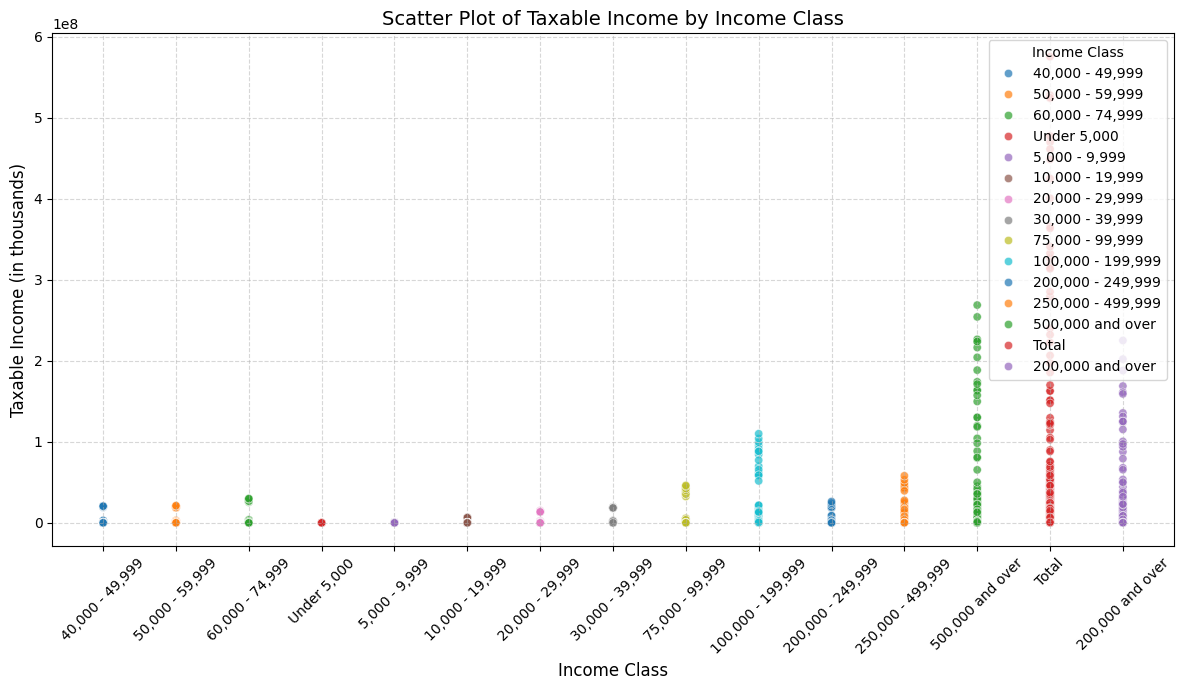

In [377]:
# Scatter plot

plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Income Class', 
    y='Taxable Income of All Returns (in thousands)', 
    data=us_tax_data,
    hue='Income Class',  # Different colors for each class
    palette='tab10',
    alpha=0.7  # Adjust transparency
)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title("Scatter Plot of Taxable Income by Income Class", fontsize=14)
plt.xlabel("Income Class", fontsize=12)
plt.ylabel("Taxable Income (in thousands)", fontsize=12)
plt.legend(title="Income Class", loc="upper right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<br>
<h2>
    5.) Data Pre-processing
</h2>
<br>

In [378]:
# Getting the categorical attributes from the dataset

us_tax_data_cat_columns = us_tax_data.select_dtypes(include=['category', 'object']).columns

us_tax_data_cat_columns

Index(['Resident Type', 'Place of Residence', 'Country', 'State', 'County',
       'Income Class', 'Disclosure'],
      dtype='object')

In [379]:
us_tax_data

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,...,Income Class Sort Order,Disclosure_missing,Number of All Returns_missing,NY AGI of All Returns (in thousands) *_missing,Deductions of All Returns (in thousands)_missing,Dependent Exemptions of All Returns (in thousands)_missing,Taxable Income of All Returns (in thousands)_missing,Tax Before Credits of All Returns (in thousands)_missing,Tax Liability of All Returns (in thousands) **_missing,outlier
0,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,...,6,0,1,1,1,1,1,1,1,False
1,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,...,7,0,1,1,1,1,1,1,1,False
2,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,...,8,0,1,1,1,1,1,1,1,False
3,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,...,1,1,0,0,0,0,0,0,0,False
4,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,...,2,1,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23730,2014,Full-Year Nonresident,Illinois,United States,Illinois,All,"Under 5,000",NaN,651.0,-468804.0,...,1,1,0,0,0,0,0,0,0,False
23731,2014,Full-Year Resident,Madison,United States,New York,Madison,"50,000 - 59,999",NaN,1803.0,98697.0,...,7,1,0,0,0,0,0,0,0,False
23732,2014,Full-Year Nonresident,Maine,United States,Maine,All,"250,000 - 499,999",NaN,196.0,67186.0,...,12,1,0,0,0,0,0,0,0,False
23733,2014,Full-Year Nonresident,Virginia,United States,Virginia,All,"10,000 - 19,999",NaN,867.0,12917.0,...,3,1,0,0,0,0,0,0,0,False


In [380]:
printUniqueValues(us_tax_data)

UNIQUE VALUES
--------------------------------------------------
Resident Type
--------------------
['Full-Year Nonresident' 'Part-Year Resident' 'Full-Year Resident']
--------------------
Total Unique values:  3


Place of Residence
--------------------
['Ireland' 'A.P.O./F.P.O' 'Canada' 'India' 'Mexico' 'China' 'France'
 'Germany' 'Israel' 'Italy' 'Japan' 'Puerto Rico' 'S. Korea'
 'United Kingdom' 'All Other Countries +++' 'Residence Unknown ++++'
 'Grand Total, Full-Year Nonresident' 'Grand Total, Part-Year Resident'
 'All Other States' 'Utah' 'Orleans' 'Nevada' 'Hamilton' 'Washington'
 'Dutchess' 'Ontario' 'New York City - Richmond' 'Clinton' 'Pennsylvania'
 'Saratoga' 'Onondaga' 'Texas' 'Massachusetts' 'Ulster' 'Livingston'
 'New Jersey' 'New York City - Kings' 'Westchester' 'Orange' 'Iowa'
 'Cortland' 'Oswego' 'Sullivan' 'Rockland' 'Missouri' 'Delaware' 'Oregon'
 'Fulton' 'Schoharie' 'Genesee' 'Seneca' 'Albany'
 'New York City - Manhattan' 'Columbia' 'Chautauqua' 'Schuyler' 'Wayn

<h3>
    From above, the attributes 'Disclosure' and 'Resident Type' can be encoded using One-hot encoding as they are having very less unique values compared to other categorical attributes.
</h3>
<h3>
    For remaining categorical attributes, we will perform LabelEncoding.
</h3>

In [381]:
one_hot_encoding_columns = ['Disclosure', 'Resident Type']

ordinal_encoding_columns = []

for attr in us_tax_data_cat_columns:
    if attr not in one_hot_encoding_columns:
        ordinal_encoding_columns.append(attr)

print("One Hot Encoding Columns: \n", one_hot_encoding_columns, "\n\n")
print("Ordinal Encoding Columns: \n", ordinal_encoding_columns, "\n")

One Hot Encoding Columns: 
 ['Disclosure', 'Resident Type'] 


Ordinal Encoding Columns: 
 ['Place of Residence', 'Country', 'State', 'County', 'Income Class'] 



In [382]:
# Knowing about Income Class Sort Order

print("Unique values in Income Class Sort Order are: ", us_tax_data['Income Class Sort Order'].unique())
print("Total unique values:", len(us_tax_data['Income Class Sort Order'].unique()))

Unique values in Income Class Sort Order are:  [ 6  7  8  1  2  3  4  5  9 10 11 12 13 14]
Total unique values: 14


In [383]:
# Knowing about Place of Residence Sort Order

print("Unique values in Place of Residence Sort Order are: ", us_tax_data['Place of Residence Sort Order'].unique())
print("Total unique values:", len(us_tax_data['Place of Residence Sort Order'].unique()))

Unique values in Place of Residence Sort Order are:  [205 150 200 204 209 201 202 203 206 207 208 210 211 212 213 214 215 250
 143  40 128  26  59 146  19  38   5  15 137  47  37 142 121  57  30 130
   2  61  39 115  17  41  54  45 125  18 136  23  49  24  51   7   3  16
  12  50  60  55  13  10  62  44 104 129  27 138   8 105  67  32 148  28
  46 149  33  43 113 145 134 126  22 100 119 124   4 132  35 116 108  36
  65  48 123 122  56 127  25 139 141  52  31   1  58  34 106  63  29 110
  21 107 144  66 109  14 140 114  53 120 102  20  11 131  42   9 111 103
 117 135 133 118 112 147 101]
Total unique values: 133


<h3>
    Creating preprocessor for above two different classification problems which is same for both.
</h3>

In [384]:
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot_encoding', OneHotEncoder(), one_hot_encoding_columns),
        ('label_encoding', OrdinalEncoder(), label_encoding_columns)
    ],
    remainder='passthrough'
)

<h3>
    Removing unnecessary attributes from the dataset in order to ease the model training
</h3>
<h3>
    Earlier, in heatmap, we saw that 'Tax Year', 'Income Class Sort Order' and 'Place of Residence Sort Order' are not highly correlated with other numerical atttributes, hence, we will not consider them for training our model.
</h3>

<h3>
    Also, we will extracting the target variables for two different classification problems.
</h3>

In [385]:
y1 = us_tax_data['Income Class Sort Order'] - 1
y2 = us_tax_data['Place of Residence Sort Order']
y2 = pd.factorize(y2)[0]
y2 = pd.Series(y2, name="Place of Residence Sort Order")

<h3>
    Above, we shifted the y1's distribution by 1 as Ordinal Encoding starts from '0'. Income Class Sort Order starting from '1' can create error of mismatch of values with target attribute in model training.
</h3>
<h3>
    Similarly for y2, the Place of Residence Sort Order has discrete but non-continuous values, hence, we scaled them in a way that they start with '0' in order to comply with requirements of model training.
</h3>

In [386]:
# Extracting required attributes list

required_attributes = list(us_tax_data.columns)


required_attributes.remove('Tax Year')
required_attributes.remove('Income Class Sort Order')
required_attributes.remove('Place of Residence Sort Order')

required_attributes

['Resident Type',
 'Place of Residence',
 'Country',
 'State',
 'County',
 'Income Class',
 'Disclosure',
 'Number of All Returns',
 'NY AGI of All Returns (in thousands) *',
 'Deductions of All Returns (in thousands)',
 'Dependent Exemptions of All Returns (in thousands)',
 'Taxable Income of All Returns (in thousands)',
 'Tax Before Credits of All Returns (in thousands)',
 'Tax Liability of All Returns (in thousands) **',
 'Disclosure_missing',
 'Number of All Returns_missing',
 'NY AGI of All Returns (in thousands) *_missing',
 'Deductions of All Returns (in thousands)_missing',
 'Dependent Exemptions of All Returns (in thousands)_missing',
 'Taxable Income of All Returns (in thousands)_missing',
 'Tax Before Credits of All Returns (in thousands)_missing',
 'Tax Liability of All Returns (in thousands) **_missing',
 'outlier']

In [387]:
X1 = required_attributes + ['Place of Residence Sort Order']
X2 = required_attributes + ['Income Class Sort Order']

print("Attributes in model training for Income Class Sort Order: \n", X1, "\n\n")
print("Attributes in model training for Place of Residence Sort Order: \n", X2)

Attributes in model training for Income Class Sort Order: 
 ['Resident Type', 'Place of Residence', 'Country', 'State', 'County', 'Income Class', 'Disclosure', 'Number of All Returns', 'NY AGI of All Returns (in thousands) *', 'Deductions of All Returns (in thousands)', 'Dependent Exemptions of All Returns (in thousands)', 'Taxable Income of All Returns (in thousands)', 'Tax Before Credits of All Returns (in thousands)', 'Tax Liability of All Returns (in thousands) **', 'Disclosure_missing', 'Number of All Returns_missing', 'NY AGI of All Returns (in thousands) *_missing', 'Deductions of All Returns (in thousands)_missing', 'Dependent Exemptions of All Returns (in thousands)_missing', 'Taxable Income of All Returns (in thousands)_missing', 'Tax Before Credits of All Returns (in thousands)_missing', 'Tax Liability of All Returns (in thousands) **_missing', 'outlier', 'Place of Residence Sort Order'] 


Attributes in model training for Place of Residence Sort Order: 
 ['Resident Type', '

In [388]:
X1 = us_tax_data[X1]
X1

,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),...,Disclosure_missing,Number of All Returns_missing,NY AGI of All Returns (in thousands) *_missing,Deductions of All Returns (in thousands)_missing,Dependent Exemptions of All Returns (in thousands)_missing,Taxable Income of All Returns (in thousands)_missing,Tax Before Credits of All Returns (in thousands)_missing,Tax Liability of All Returns (in thousands) **_missing,outlier,Place of Residence Sort Order
0,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,NaN,...,0,1,1,1,1,1,1,1,False,205
1,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,NaN,...,0,1,1,1,1,1,1,1,False,205
2,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,NaN,...,0,1,1,1,1,1,1,1,False,205
3,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,105.0,...,1,0,0,0,0,0,0,0,False,150
4,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,255.0,...,1,0,0,0,0,0,0,0,False,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23730,Full-Year Nonresident,Illinois,United States,Illinois,All,"Under 5,000",NaN,651.0,-468804.0,1014.0,...,1,0,0,0,0,0,0,0,False,113
23731,Full-Year Resident,Madison,United States,New York,Madison,"50,000 - 59,999",NaN,1803.0,98697.0,23681.0,...,1,0,0,0,0,0,0,0,False,31
23732,Full-Year Nonresident,Maine,United States,Maine,All,"250,000 - 499,999",NaN,196.0,67186.0,4485.0,...,1,0,0,0,0,0,0,0,False,119
23733,Full-Year Nonresident,Virginia,United States,Virginia,All,"10,000 - 19,999",NaN,867.0,12917.0,6028.0,...,1,0,0,0,0,0,0,0,False,145


In [389]:
X2 = us_tax_data[X2]
X2

,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),...,Disclosure_missing,Number of All Returns_missing,NY AGI of All Returns (in thousands) *_missing,Deductions of All Returns (in thousands)_missing,Dependent Exemptions of All Returns (in thousands)_missing,Taxable Income of All Returns (in thousands)_missing,Tax Before Credits of All Returns (in thousands)_missing,Tax Liability of All Returns (in thousands) **_missing,outlier,Income Class Sort Order
0,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,NaN,...,0,1,1,1,1,1,1,1,False,6
1,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,NaN,...,0,1,1,1,1,1,1,1,False,7
2,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,NaN,...,0,1,1,1,1,1,1,1,False,8
3,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,105.0,...,1,0,0,0,0,0,0,0,False,1
4,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,255.0,...,1,0,0,0,0,0,0,0,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23730,Full-Year Nonresident,Illinois,United States,Illinois,All,"Under 5,000",NaN,651.0,-468804.0,1014.0,...,1,0,0,0,0,0,0,0,False,1
23731,Full-Year Resident,Madison,United States,New York,Madison,"50,000 - 59,999",NaN,1803.0,98697.0,23681.0,...,1,0,0,0,0,0,0,0,False,7
23732,Full-Year Nonresident,Maine,United States,Maine,All,"250,000 - 499,999",NaN,196.0,67186.0,4485.0,...,1,0,0,0,0,0,0,0,False,12
23733,Full-Year Nonresident,Virginia,United States,Virginia,All,"10,000 - 19,999",NaN,867.0,12917.0,6028.0,...,1,0,0,0,0,0,0,0,False,3


<h3>
    Here, we have separated the required attributes into the two different required datasets for training two different classification problems that we mentioned earlier.
</h3>

<br>
<h2>
    6.) Model Training
</h2>
<br>

<h3>
    Creating Pipeline for two different classification problems.
</h3>

In [390]:
pipeline_income_order = Pipeline(
    steps=[
        ('preprocessor', preprocessor),   # Pre-processing the data
        ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=len(y1.unique()), use_label_encoder=False, eval_metric='mlogloss'))
    ]
)

In [391]:
pipeline_residence_order = Pipeline(
    steps=[
        ('preprocessor', preprocessor),   # Pre-processing the data
        ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=len(y2.unique()), use_label_encoder=False, eval_metric='mlogloss'))
    ]
)

<h3>
    Splitting data into training and testing sets
</h3>

In [392]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=24)

In [393]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=24)

<h3>
    Training Model : Income Class Order
</h3>

In [394]:
pipeline_income_order.fit(X_train_1, y_train_1)

C:\Users\manishpra\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoding',
                                                  OneHotEncoder(),
                                                  ['Disclosure',
                                                   'Resident Type']),
                                                 ('label_encoding',
                                                  OrdinalEncoder(),
                                                  ['Place of Residence',
                                                   'Country', 'State', 'County',
                                                   'Income Class'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=14,
                               num_parallel_tree=None, ...))])

In [395]:
y_pred_1 = pipeline_income_order.predict(X_test_1)

<h3>
    Training Model: Place of Residence Order
</h3>

In [396]:
pipeline_residence_order.fit(X_train_2, y_train_2)

C:\Users\manishpra\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoding',
                                                  OneHotEncoder(),
                                                  ['Disclosure',
                                                   'Resident Type']),
                                                 ('label_encoding',
                                                  OrdinalEncoder(),
                                                  ['Place of Residence',
                                                   'Country', 'State', 'County',
                                                   'Income Class'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=133,
                               num_parallel_tree=None, ...))])

In [397]:
y_pred_2 = pipeline_residence_order.predict(X_test_2)

<br>
<h2>
    7.) Model Evaluation
</h2>
<br>

<h3>
    Evaluating model : Income Class Order
</h3>

Accuracy of Income Class Order Classifier is 99.1363

Classification Report of Income Class Order Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       359
           2       1.00      1.00      1.00       393
           3       1.00      1.00      1.00       342
           4       1.00      1.00      1.00       376
           5       1.00      1.00      1.00       368
           6       1.00      1.00      1.00       364
           7       1.00      1.00      1.00       381
           8       1.00      1.00      1.00       332
           9       1.00      1.00      1.00       343
          10       1.00      1.00      1.00       366
          11       0.94      0.95      0.95       392
          12       1.00      1.00      1.00       199
          13       0.89      0.88      0.89       183

    accuracy                           0.99      4747
   macro avg       0.99

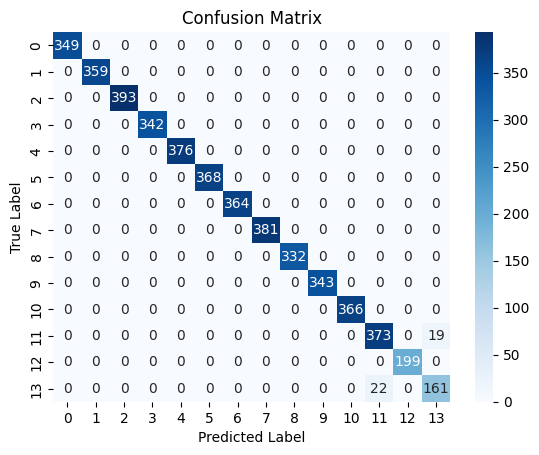

In [402]:
evaluateModel(y_pred=y_pred_1, y_test=y_test_1, model_name="Income Class Order Classifier")

<h3>
    Evaluating model : Place of Residence Order
</h3>

In [403]:
evaluateModel(y_pred=y_pred_2, y_test=y_test_2, model_name="Place of Residence Order Classifier")

Accuracy of Place of Residence Order Classifier is 99.9789

Classification Report of Place of Residence Order Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        45
          15

<h3>
    Above, the accuracy of both of our classification model is more than 99%.
</h3>

<h3>
    Hence, after peforming multiple steps on analyzing the nature, outliers and context of our dataset, we chose the XGBoost Classifier model for our multi-class classification and got accuracy of more than 99% on the test data.
</h3>

<h3>
    Therefore, hereby we conclude our Data Analysis
</h3>